In [1]:
file_path = "/content/Cit-HepTh.txt"

with open(file_path, "r") as file:
    for _ in range(10):
        print(file.readline().strip())


# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt
# Paper citation network of Arxiv High Energy Physics Theory category
# Nodes: 27770 Edges: 352807
# FromNodeId	ToNodeId
1001	9304045
1001	9308122
1001	9309097
1001	9311042
1001	9401139
1001	9404151


In [2]:
import tarfile

with tarfile.open("/content/cit-HepTh-abstracts.tar.gz", "r:gz") as tar:
    tar.extractall(path="/content/cit-HepTh-abstracts")

print(" Abstracts extracted.")




 Abstracts extracted.


In [3]:
import re
from pathlib import Path
import pandas as pd


base_path = Path("/content/cit-HepTh-abstracts")
metadata_records = []

# mapping function for field classification
def map_to_field(raw_text):
    raw_text = raw_text.lower()
    if "phenomenology" in raw_text:
        return "hep-ph"
    elif "experiment" in raw_text:
        return "hep-ex"
    elif "lattice" in raw_text:
        return "hep-lat"
    elif "quantum algebra" in raw_text or "mathematical physics" in raw_text:
        return "hep-th"
    elif any(term in raw_text for term in ["chaotic dynamics", "superconductivity", "quantum hall", "mesoscopic", "statistical mechanics"]):
        return "cond-mat"
    elif any(term in raw_text for term in ["algebraic geometry", "differential geometry", "symplectic", "functional analysis"]):
        return "math-ph"
    elif "theory" in raw_text:
        return "hep-th"
    else:
        return "other"

# Iterate through all files
for year_folder in base_path.iterdir():
    if year_folder.is_dir():
        for file in year_folder.glob("*.abs"):
            try:
                with open(file, "r", encoding="utf-8", errors="ignore") as f:
                    lines = f.readlines()
                paper_id = int(file.stem)
                field_line = next((line for line in lines if "Subj-class:" in line), None)
                if field_line:
                    raw_subject = field_line.replace("Subj-class:", "").strip()
                    field = map_to_field(raw_subject)
                    metadata_records.append({"paper_id": paper_id, "field": field})
            except Exception as e:
                print(f"Error reading {file.name}: {e}")


metadata_df = pd.DataFrame(metadata_records)
metadata_df.to_csv("/content/metadata.csv", index=False)
metadata_df['field'].value_counts(), metadata_df.head()


(field
 hep-th      1900
 math-ph      439
 cond-mat     204
 Name: count, dtype: int64,
    paper_id    field
 0    106275   hep-th
 1    106104   hep-th
 2    101227   hep-th
 3    105201   hep-th
 4    103254  math-ph)

In [4]:
# Clean up
metadata_df["field"] = metadata_df["field"].str.strip().str.replace(r"[^\w\-]+", "", regex=True)


metadata_df.to_csv("/content/metadata.csv", index=False)

metadata_df['field'].value_counts()


,count
field,
hep-th,1900
math-ph,439
cond-mat,204


In [5]:
import gzip

#Load the submission dates file
with gzip.open("/content/cit-HepTh-dates.txt.gz", 'rt') as f:
    time_df = pd.read_csv(f, sep='\t', header=None, names=["paper_id", "date"])

# Remove comments and clean paper IDs
time_df = time_df[~time_df['paper_id'].astype(str).str.startswith('#')].copy()
time_df['paper_id'] = time_df['paper_id'].astype(int)
time_df['date'] = pd.to_datetime(time_df['date'])

# Load your metadata (fields per paper)
metadata = pd.read_csv("/content/metadata.csv")  # Update path if needed

# Merge metadata with dates
merged_df = pd.merge(metadata, time_df, on="paper_id", how="inner")

# Add 'year' column
merged_df['year'] = merged_df['date'].dt.year

# save
merged_df.to_csv("/content/metadata_with_dates.csv", index=False)


print(" metadata_with_dates.csv created.")
merged_df.head()


 metadata_with_dates.csv created.


,paper_id,field,date,year
0,106275,hep-th,2001-06-25,2001
1,106104,hep-th,2001-06-10,2001
2,101227,hep-th,2001-01-19,2001
3,105201,hep-th,2001-05-19,2001
4,103254,math-ph,2001-03-23,2001


In [6]:
#!pip uninstall networkx -y
#!pip install networkx

Starting Citation Network Analysis...
Loading citation network data...
Loaded 9171 citation edges from 1993.0 to 2002.0

Years available in dataset: [np.float64(1993.0), np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2000.0), np.float64(2001.0), np.float64(2002.0)]
Year range: 1993.0 to 2002.0
Building yearly graphs with window size 3...
Processing years from 1993 to 2003
Available years in data: [np.float64(1993.0), np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2000.0), np.float64(2001.0), np.float64(2002.0)]
Processing years from 1993 to 2003
Available years in data: [np.float64(1993.0), np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2000.0), np.float64(2001.0), np.float64(2002.0)]
Processing years from 1993 to 2003
Available years in 

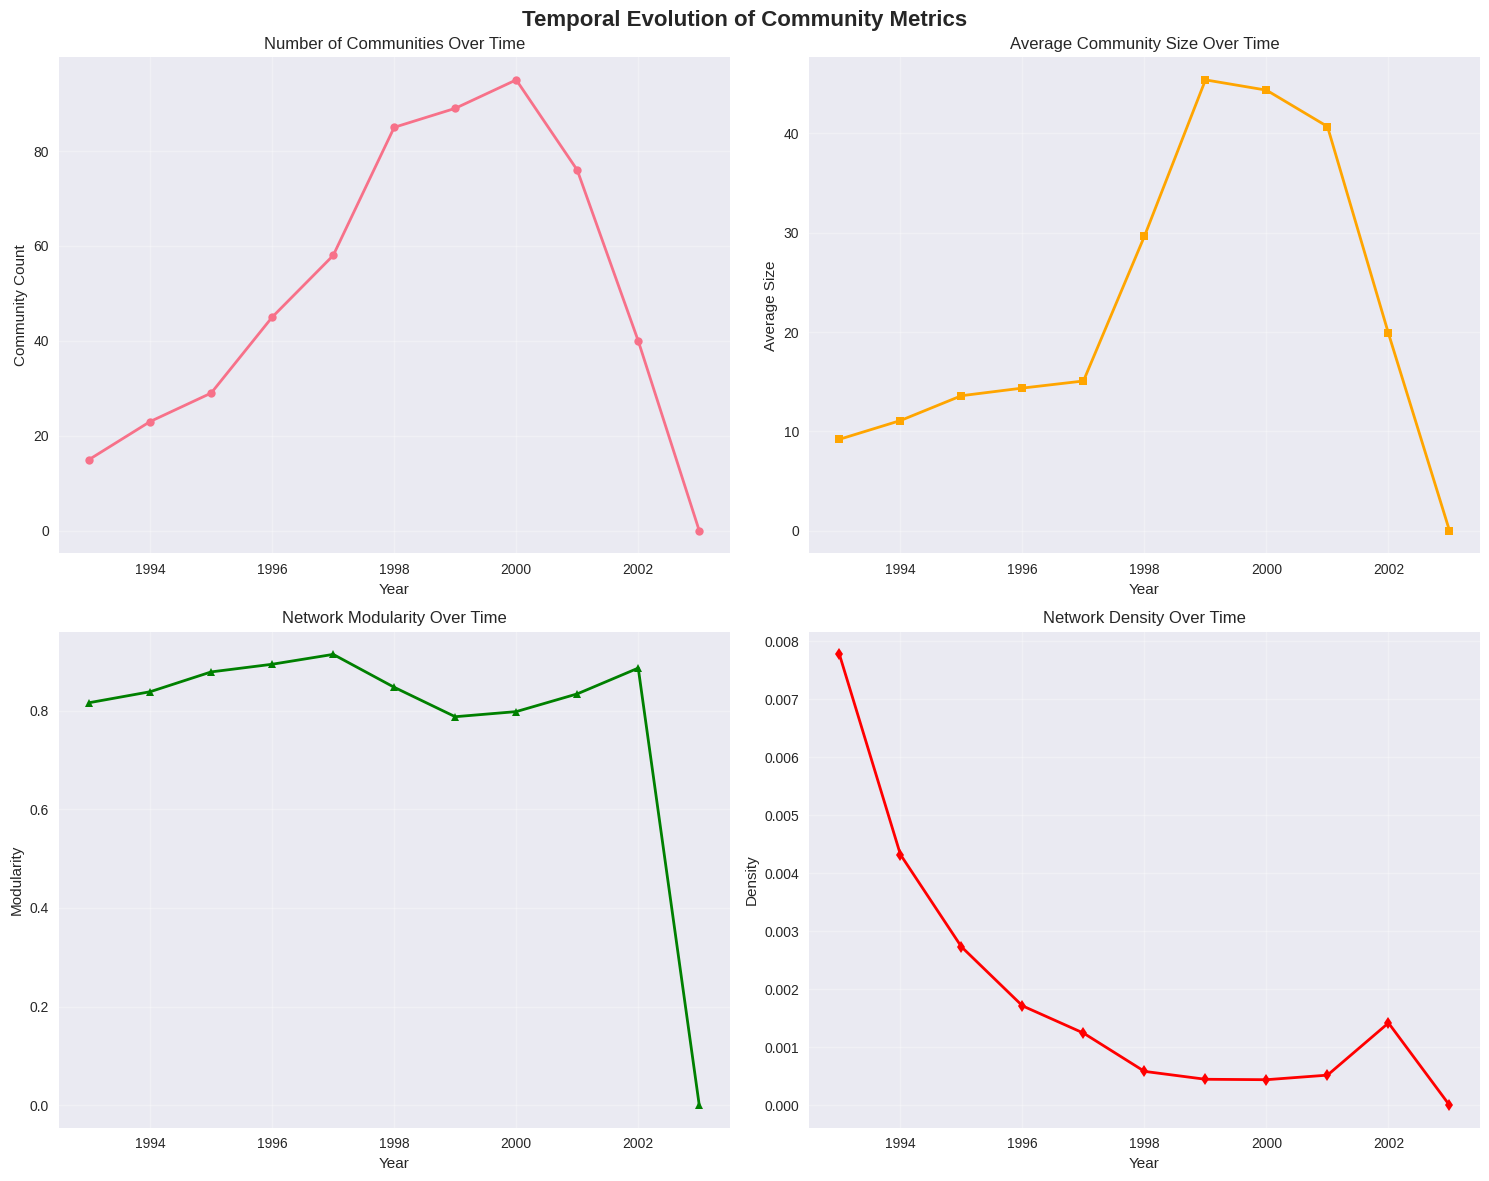

Creating community size distributions...


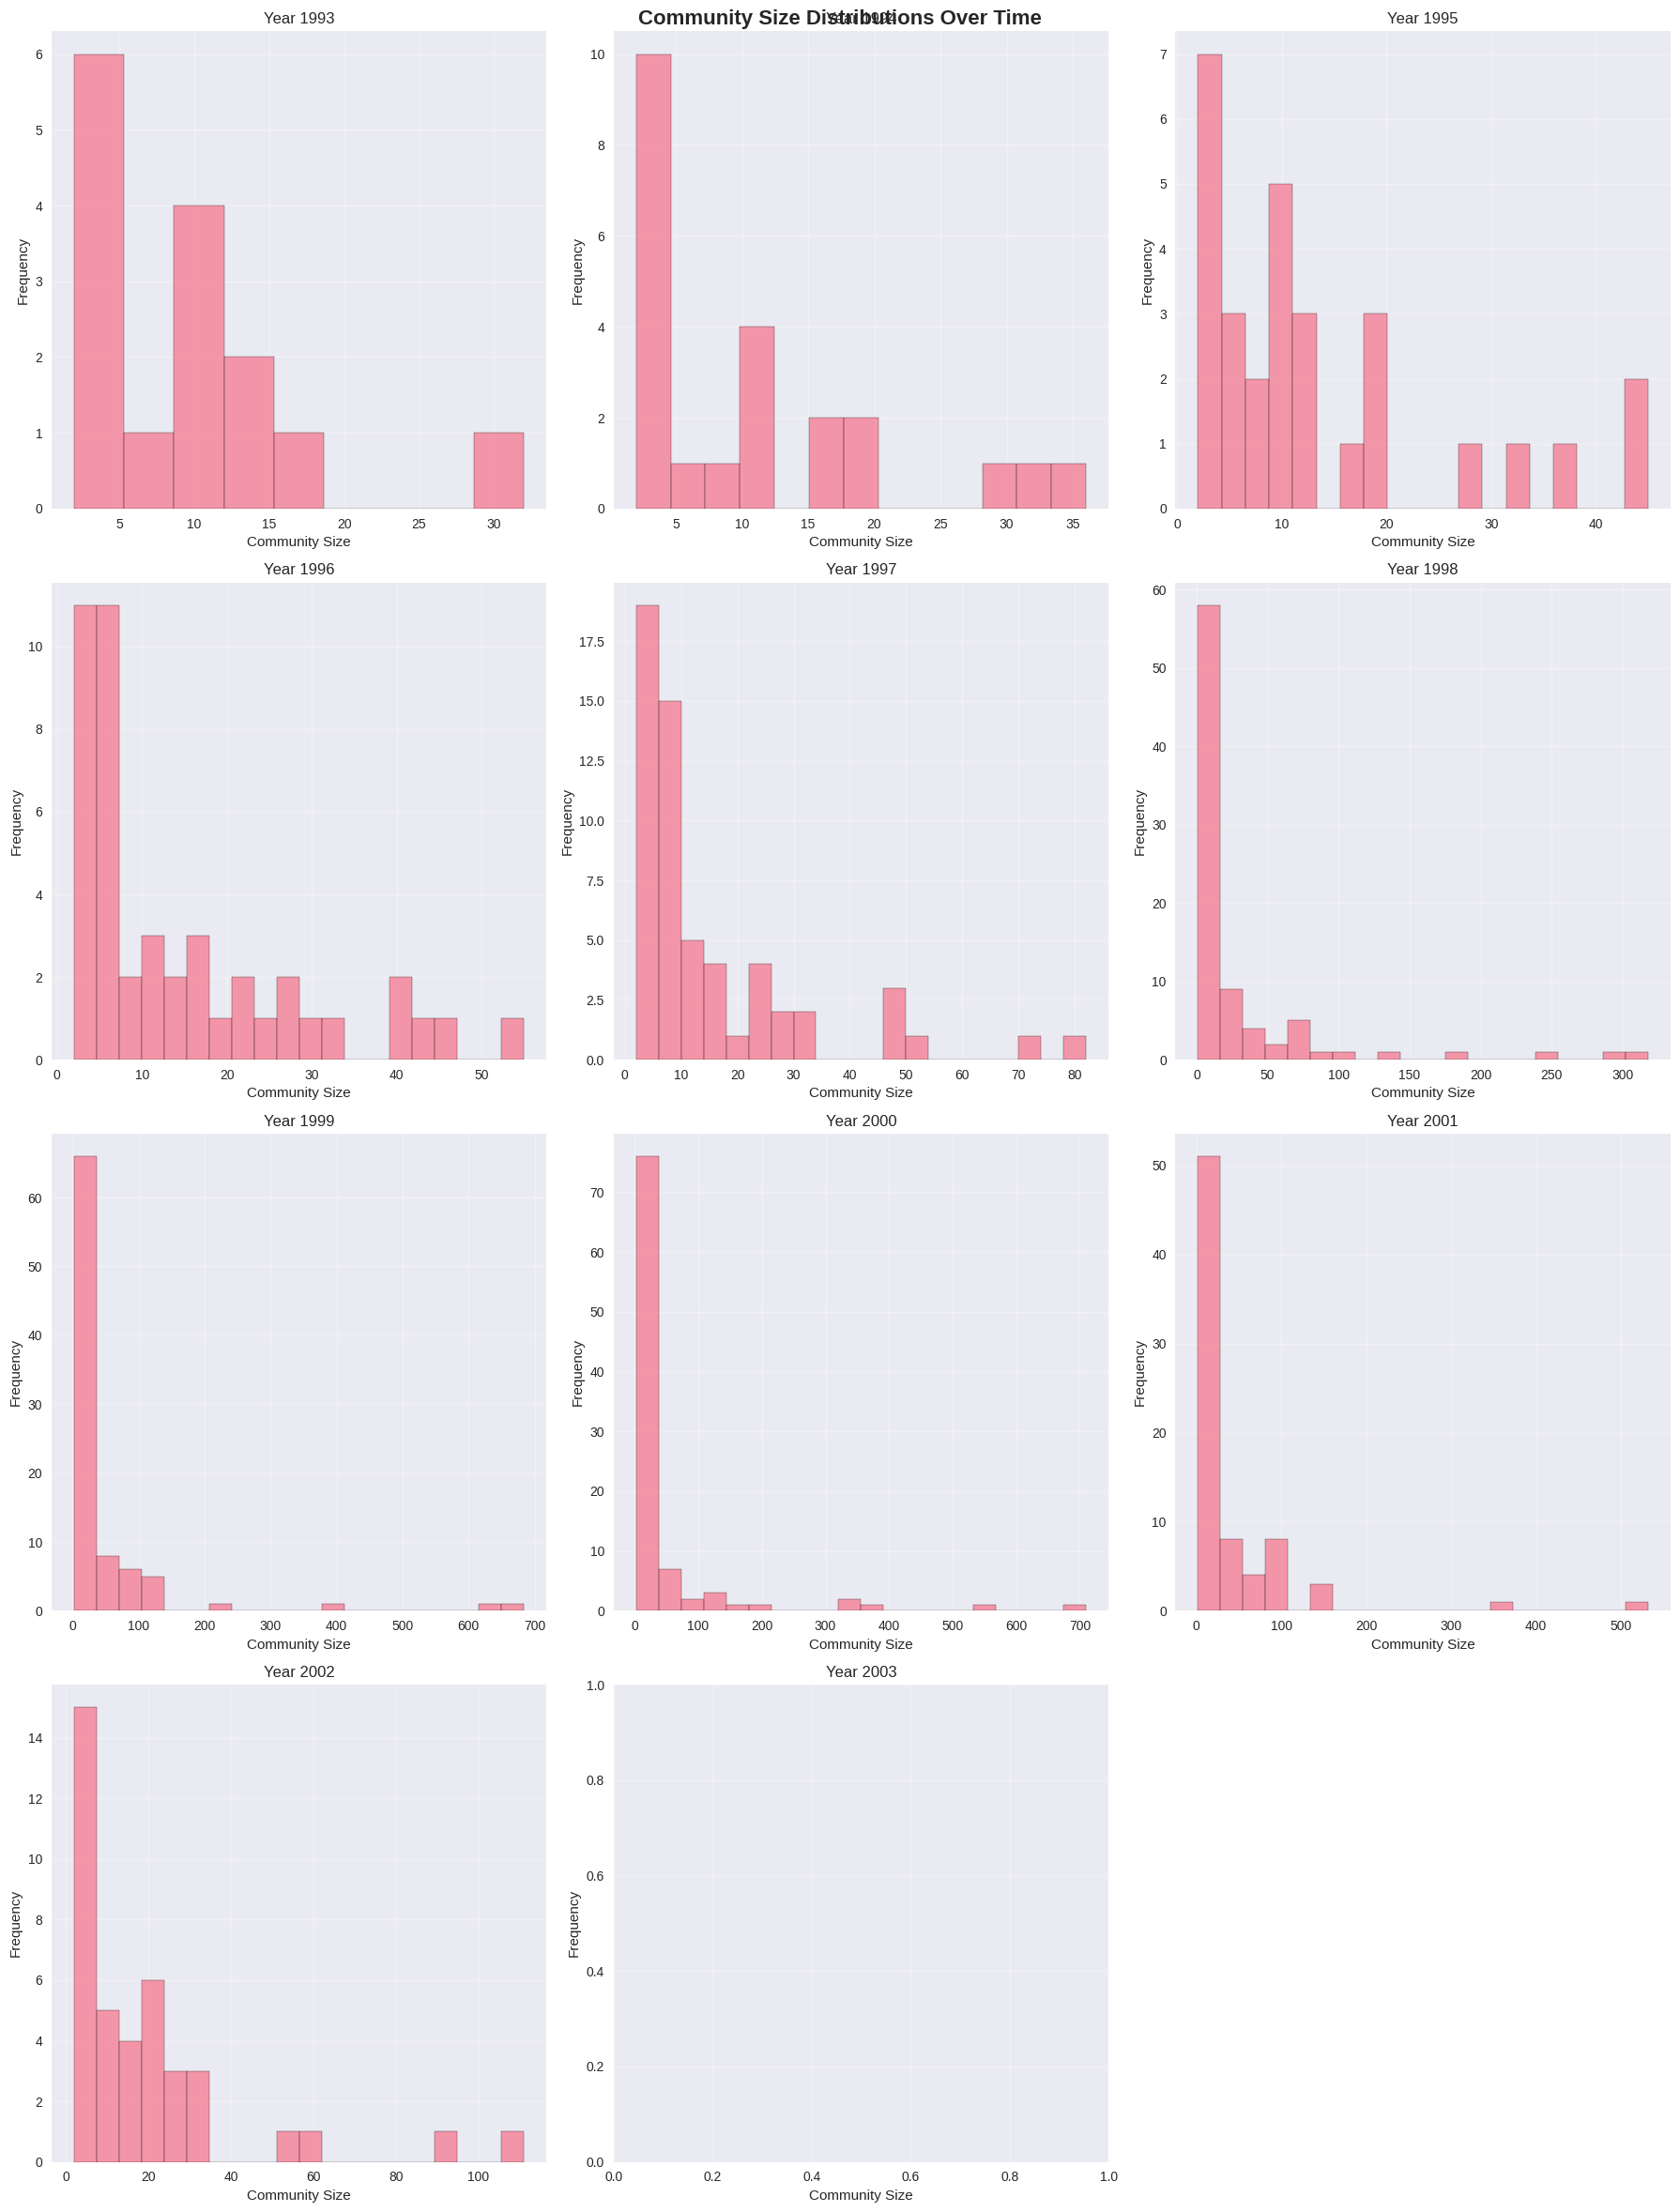

Creating self-citation analysis...


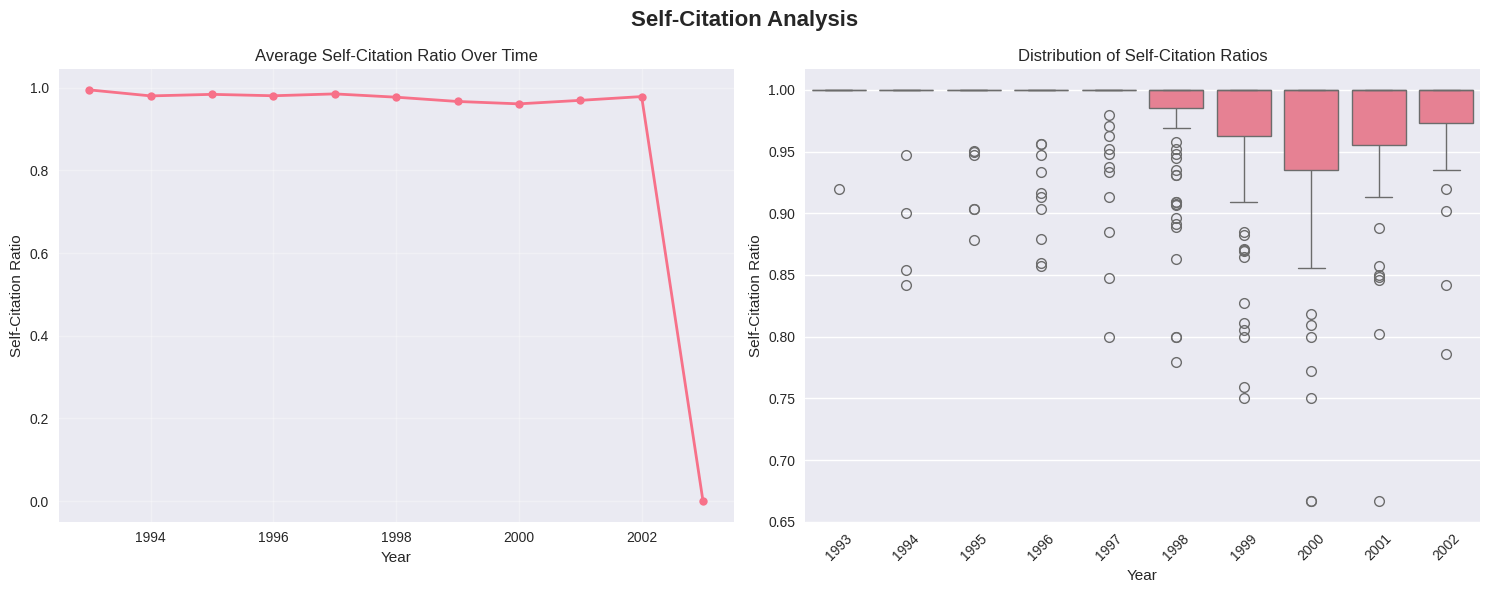

Creating meta-graph analysis for all years...


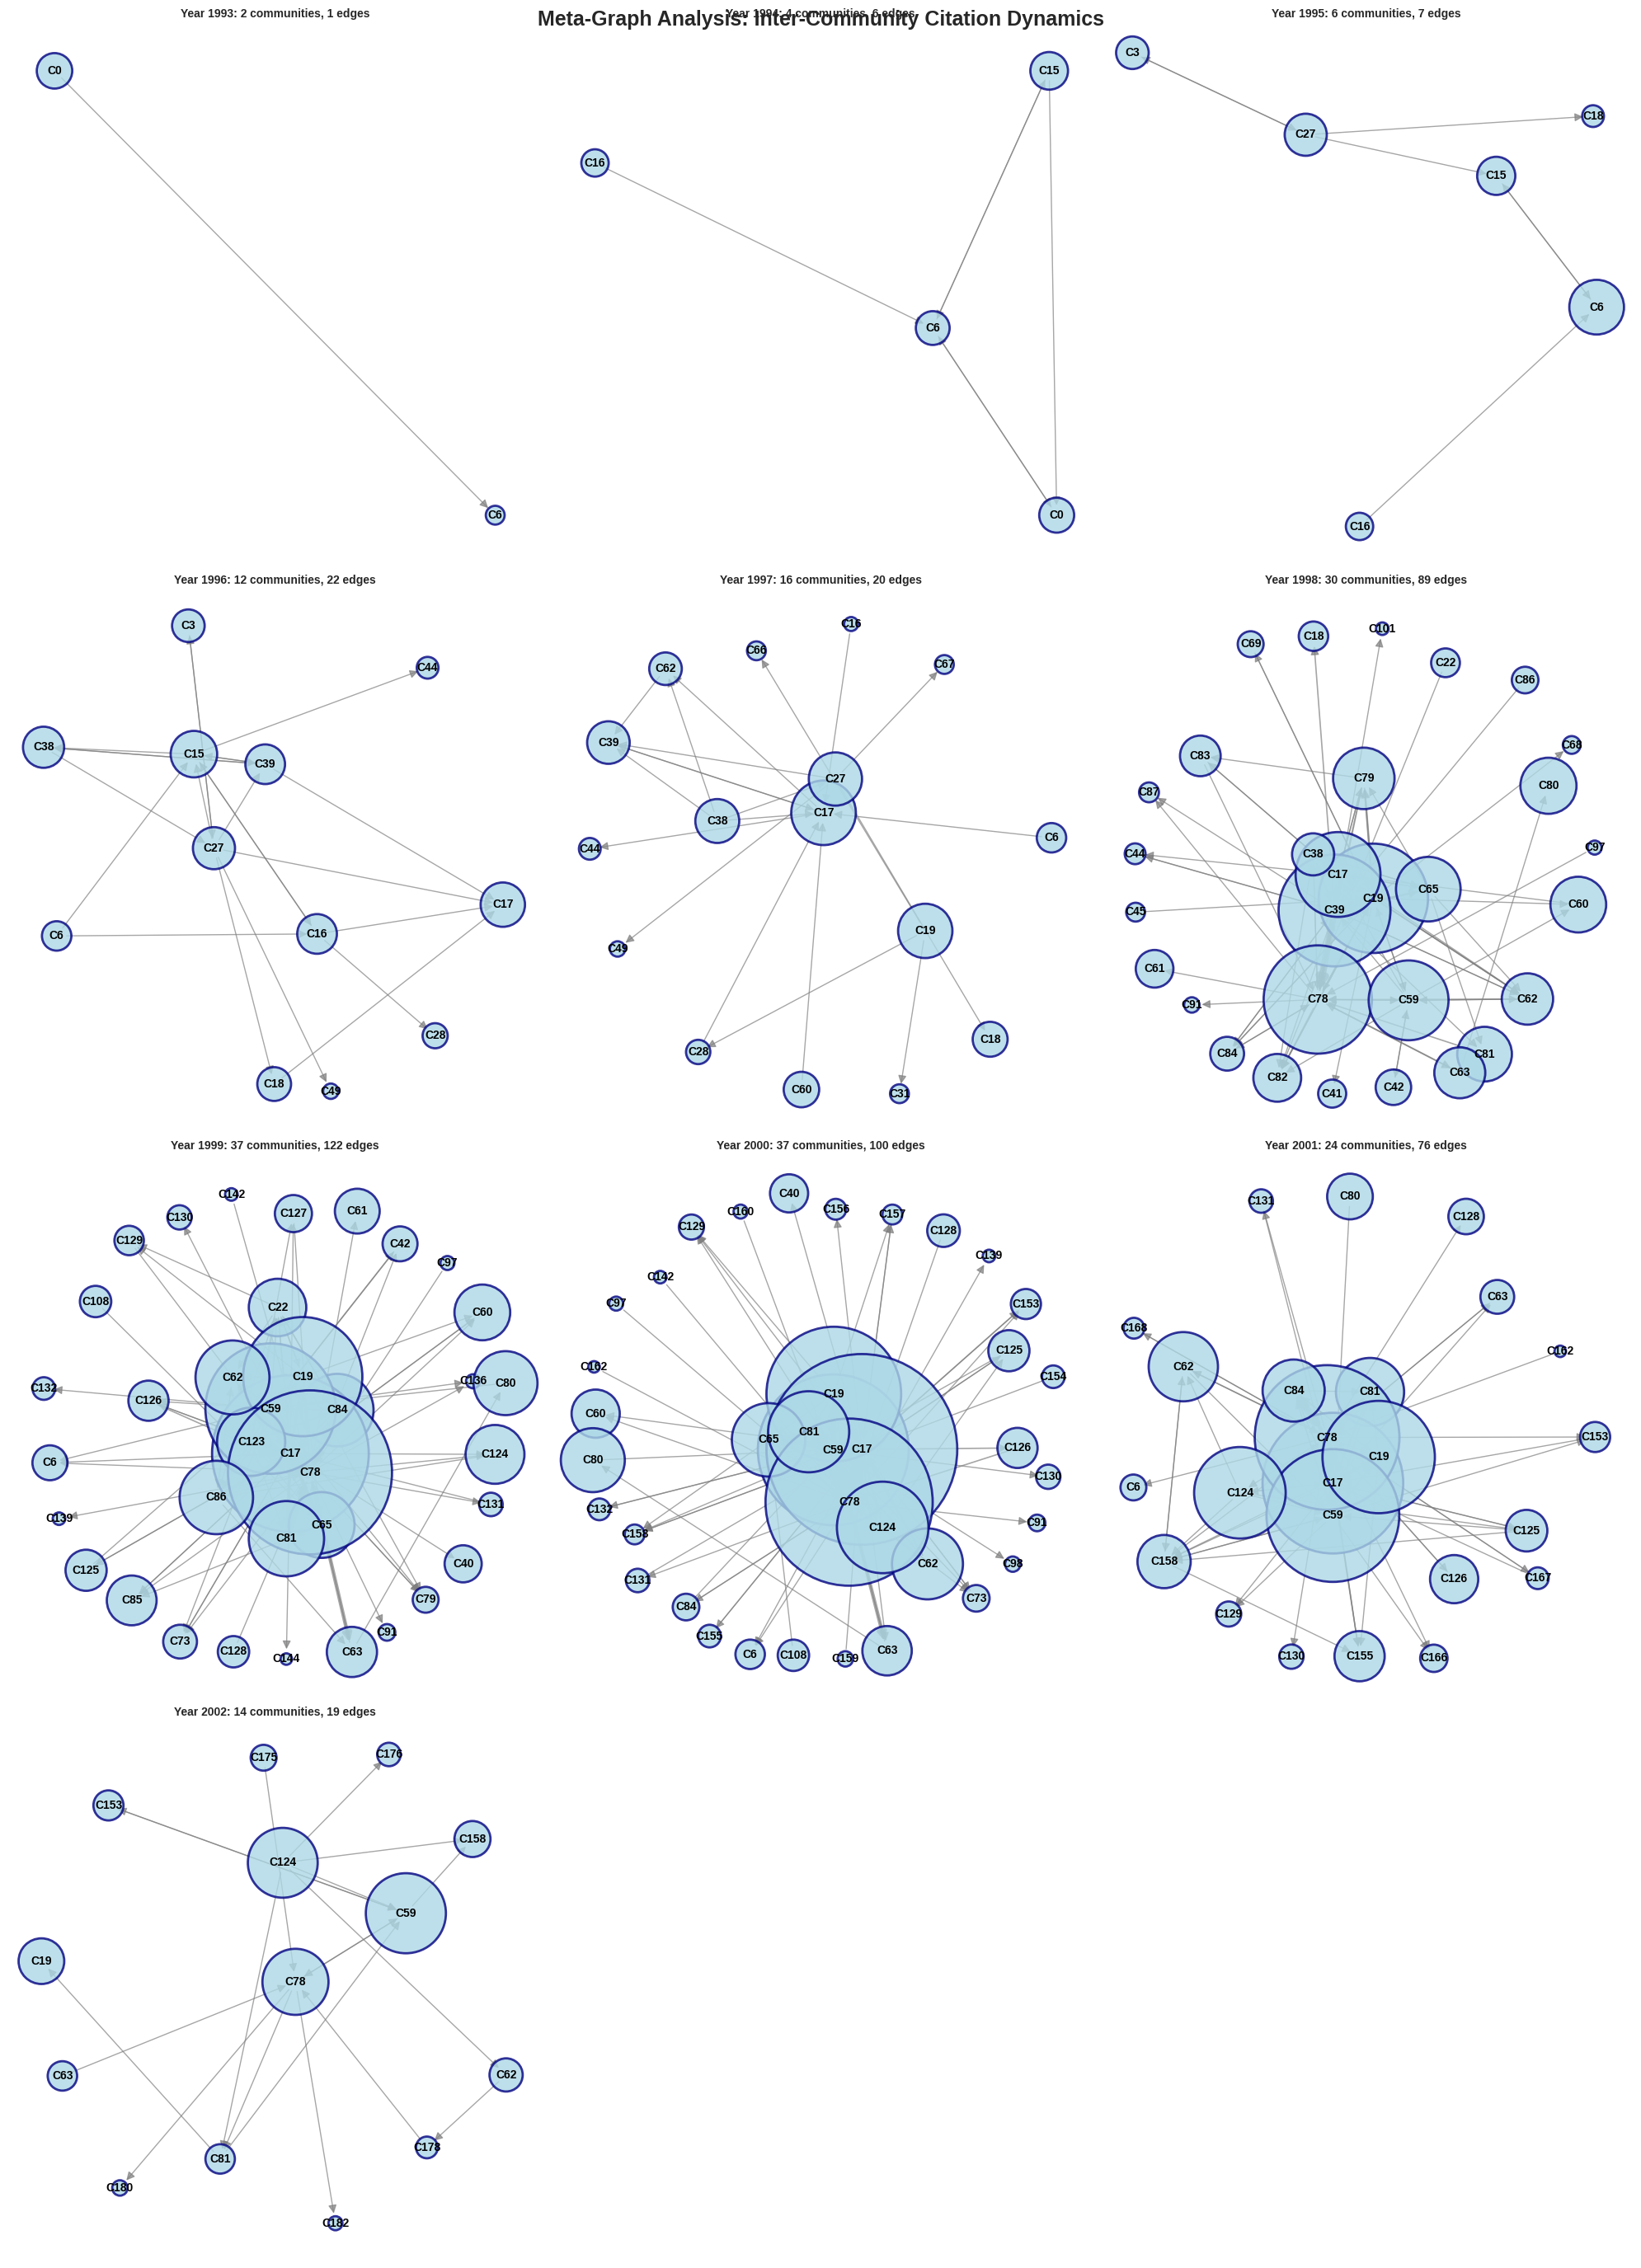


Edge Classification Summary Across All Years:
  New: 277 edges
  Growing: 65 edges
  Stable: 70 edges
  Declining: 49 edges


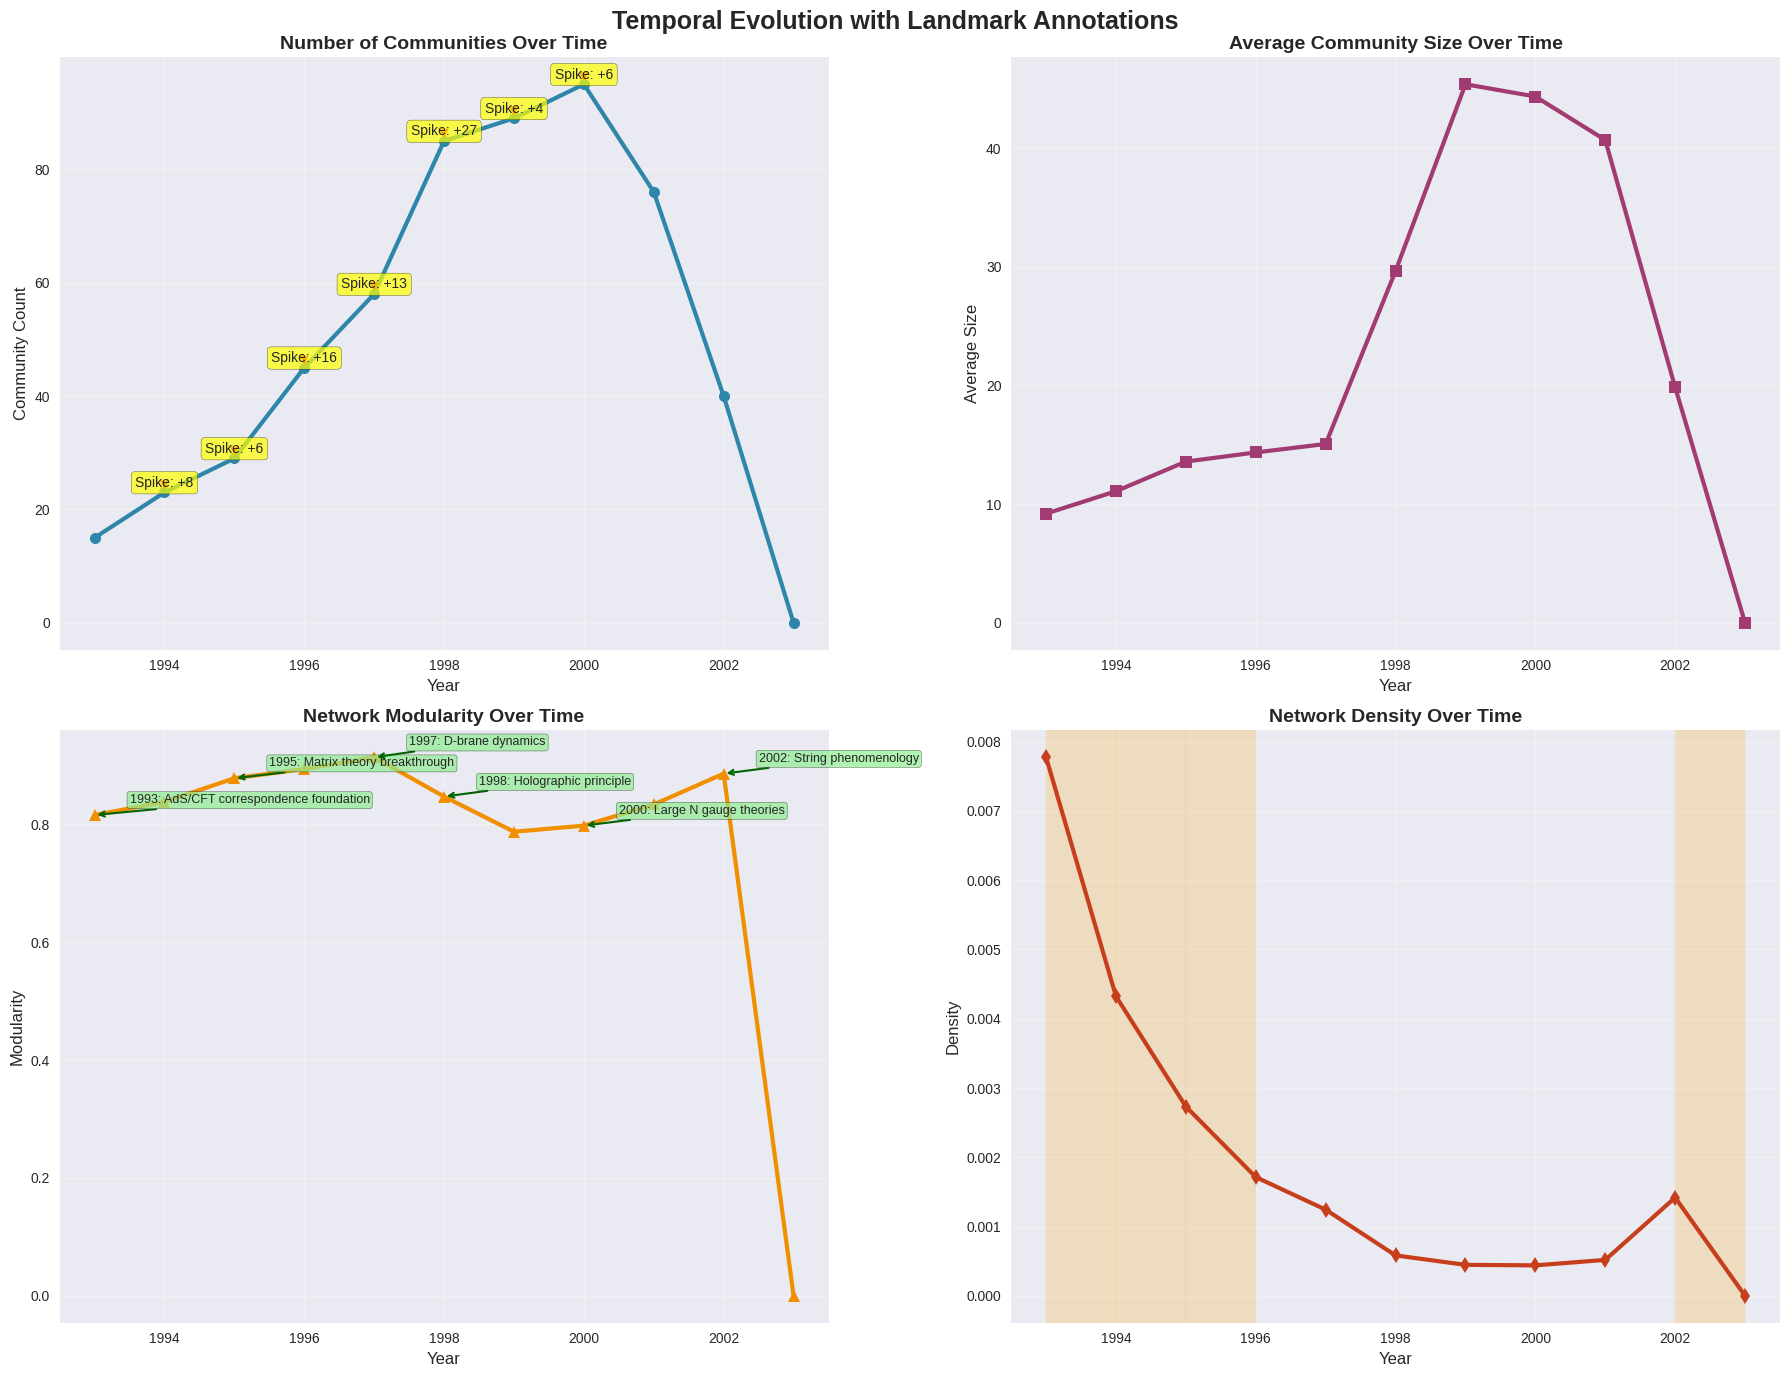

Creating meta-graph statistics...


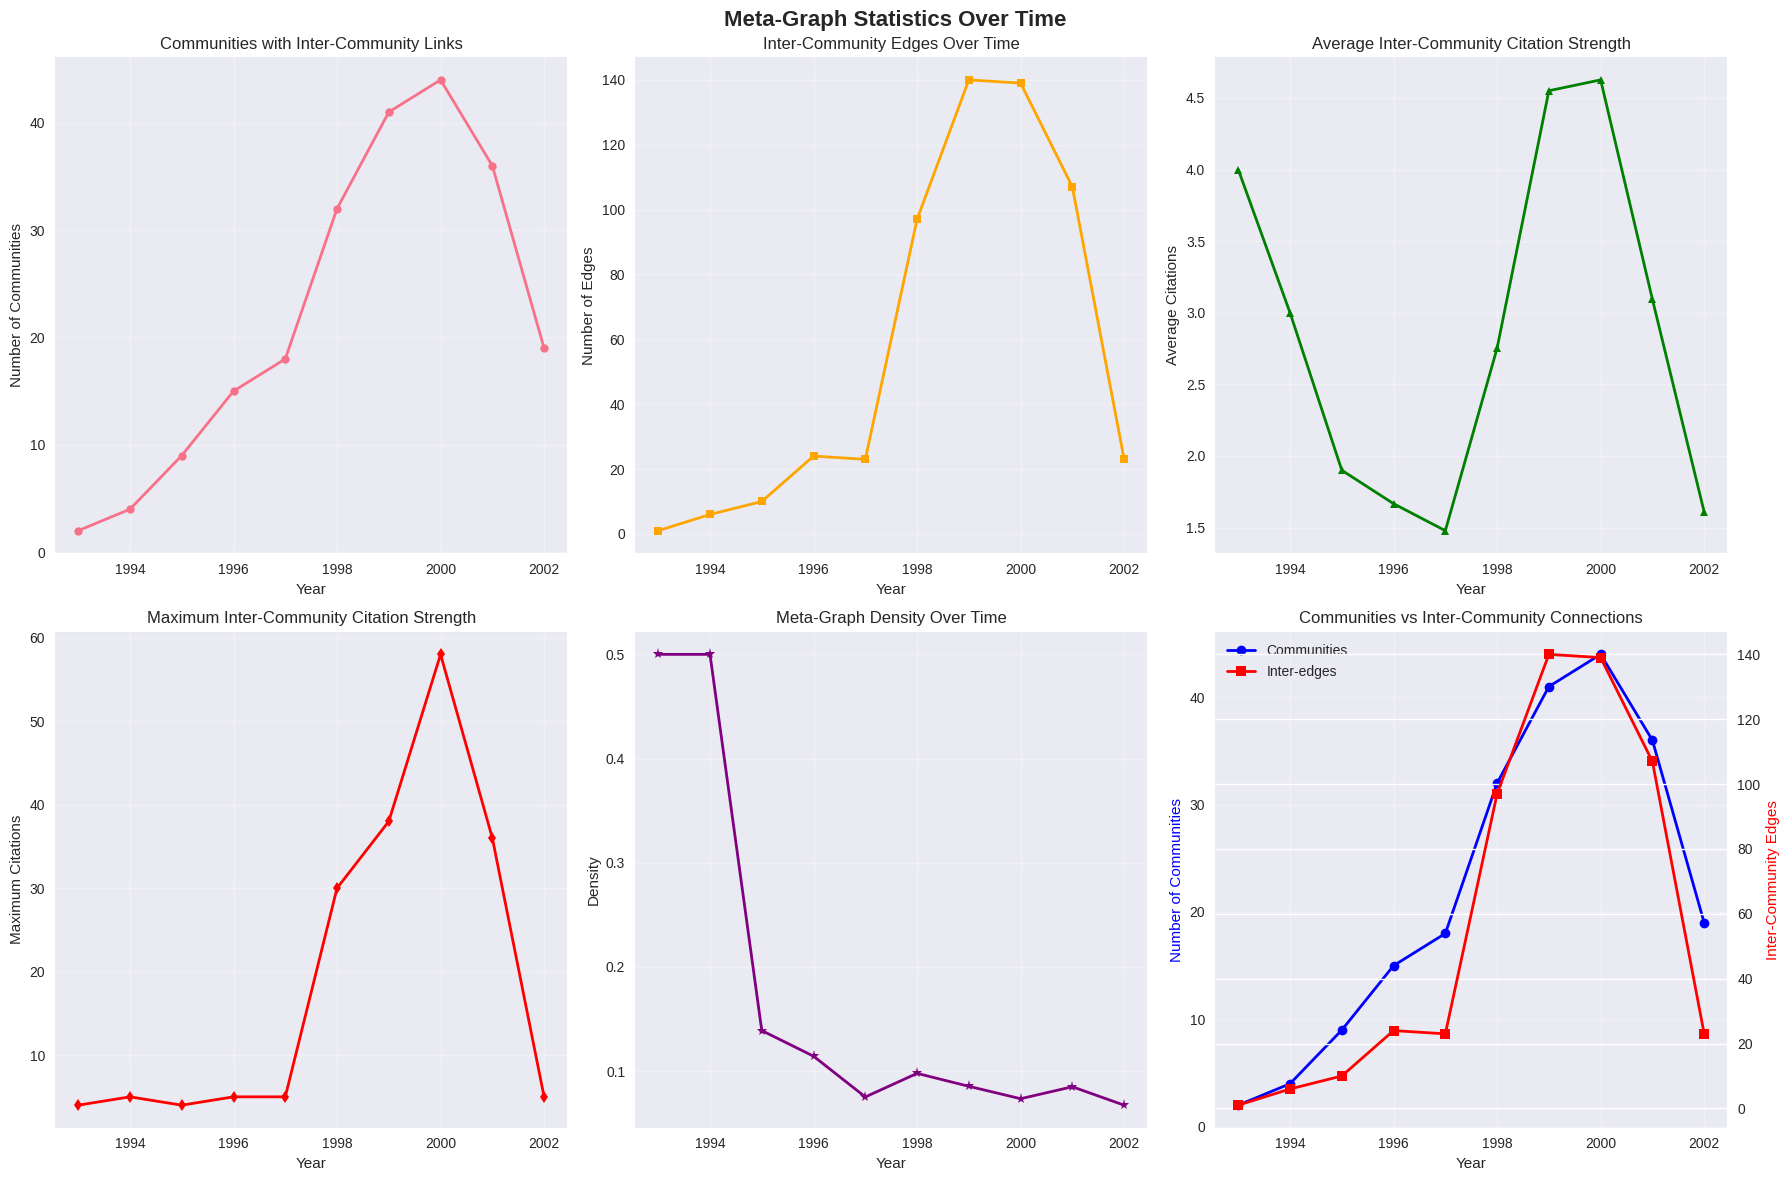

Creating inter-community citation histograms with statistics...

Generating grid of inter-community citation histograms...


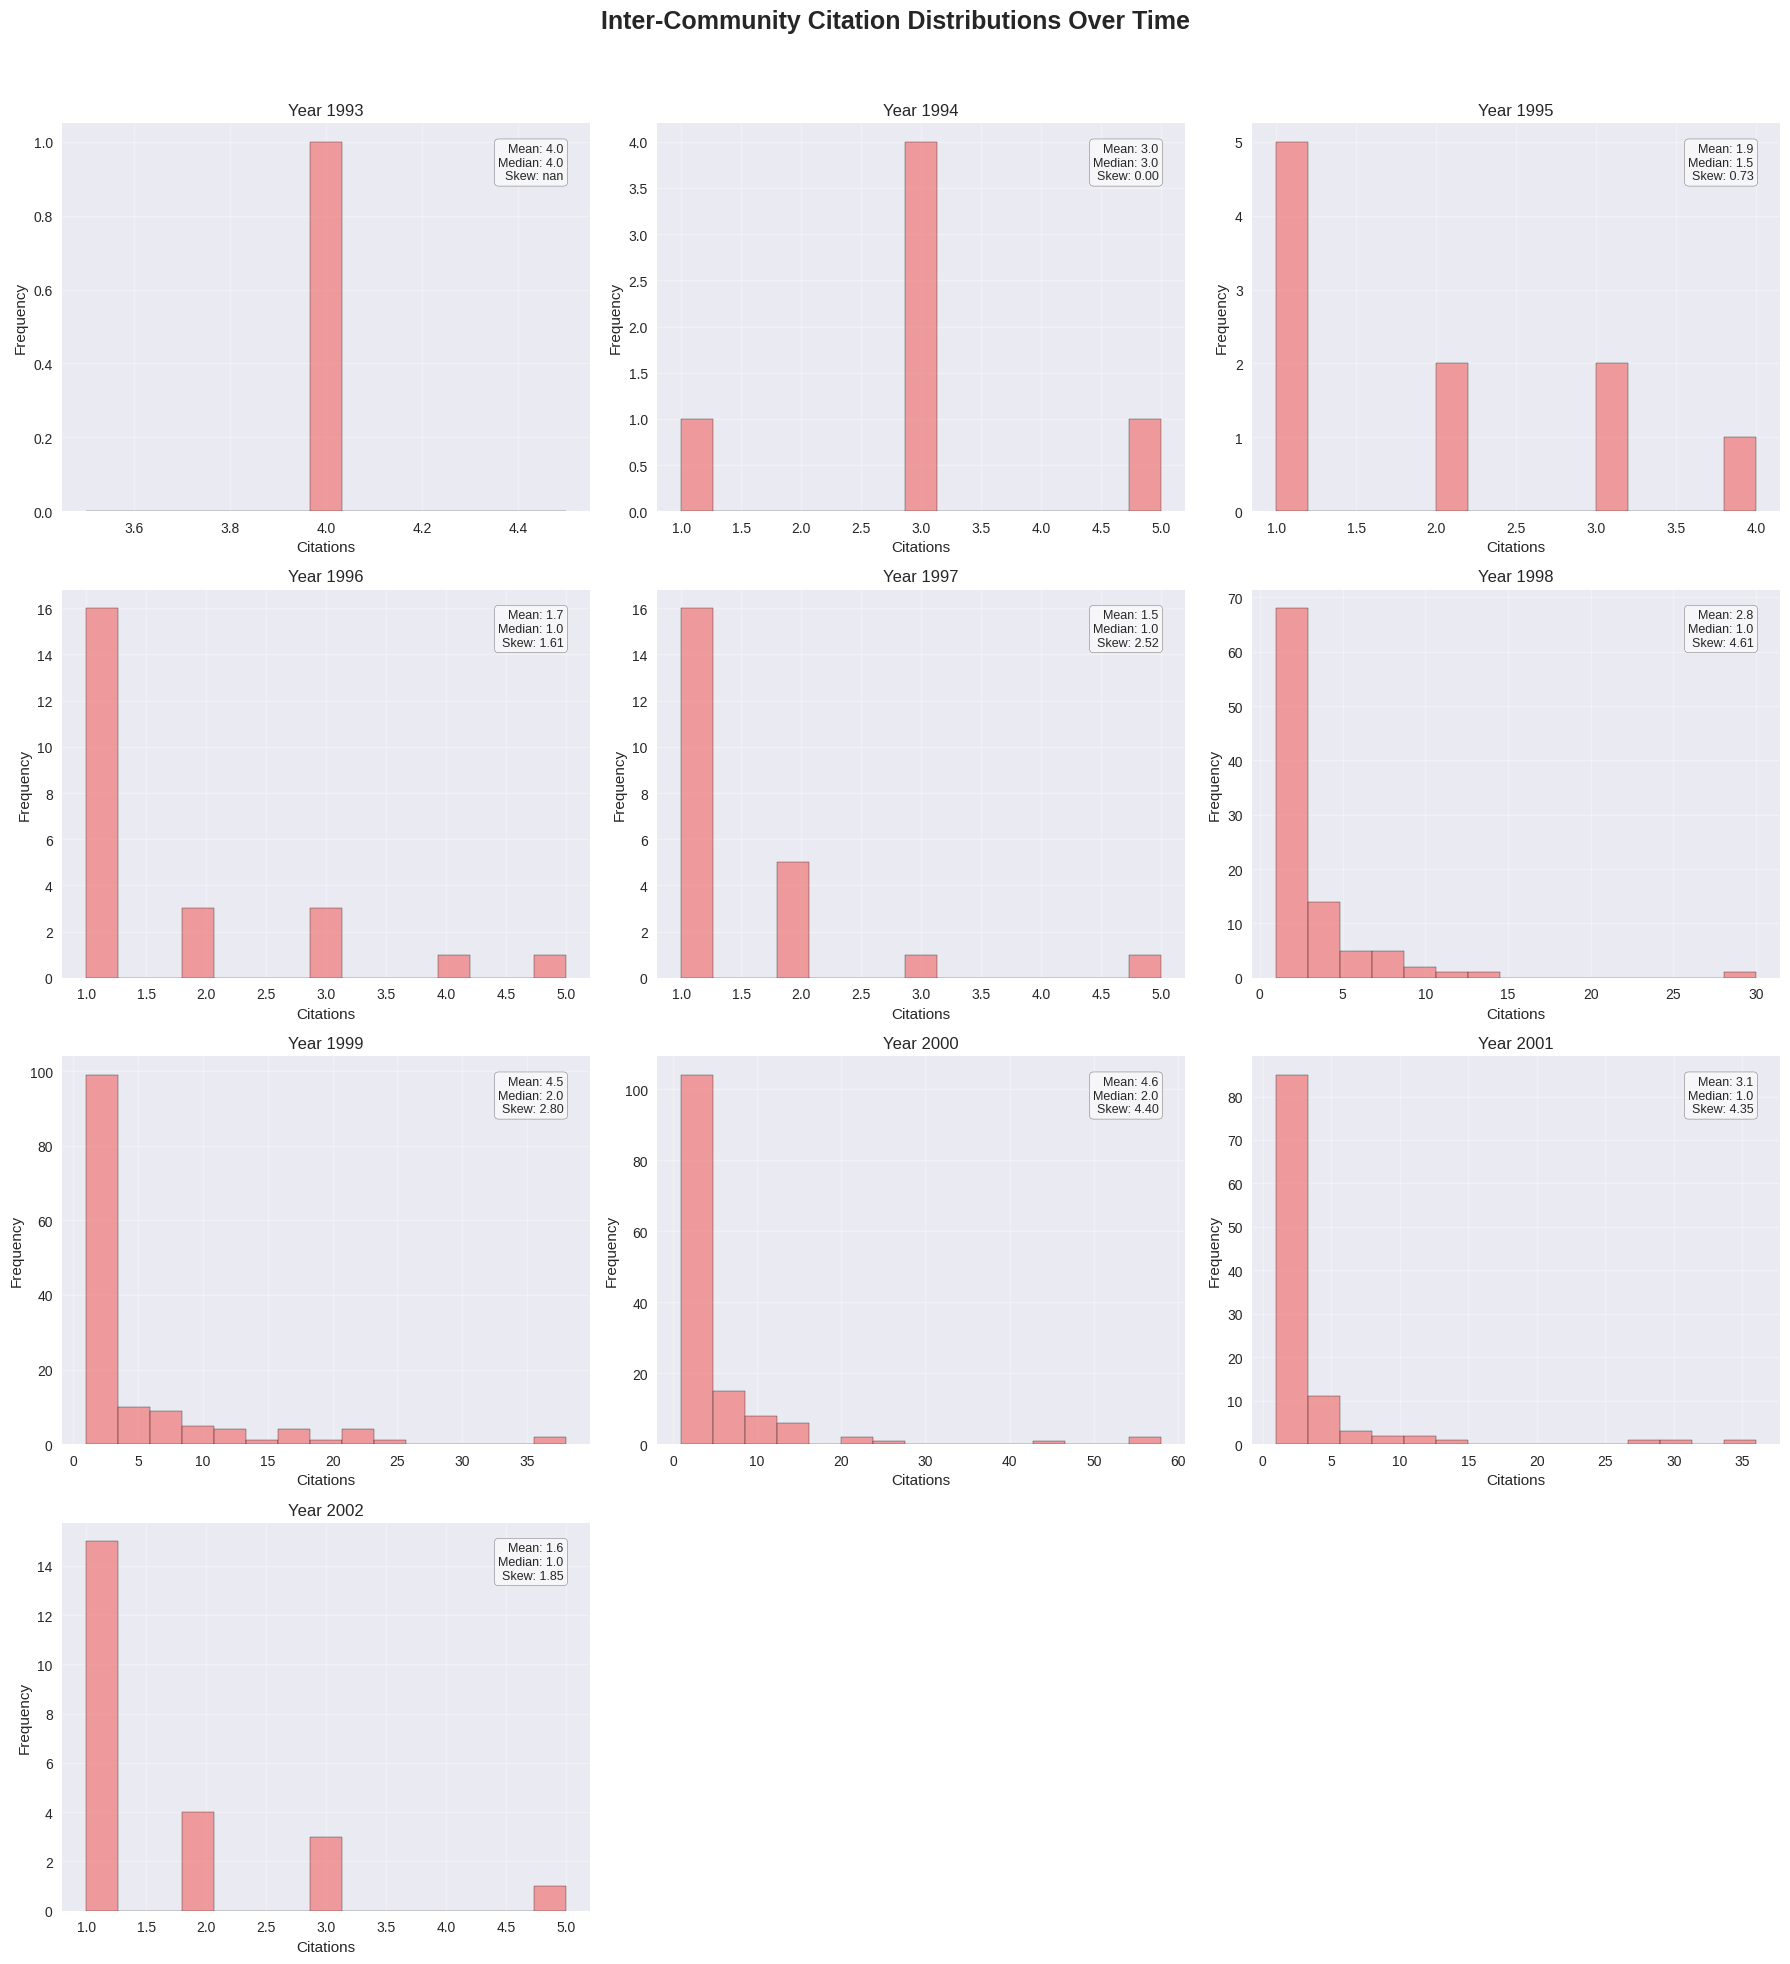

Creating interactive visualization...


Creating community stability plot...

Generating Community Stability Analysis...


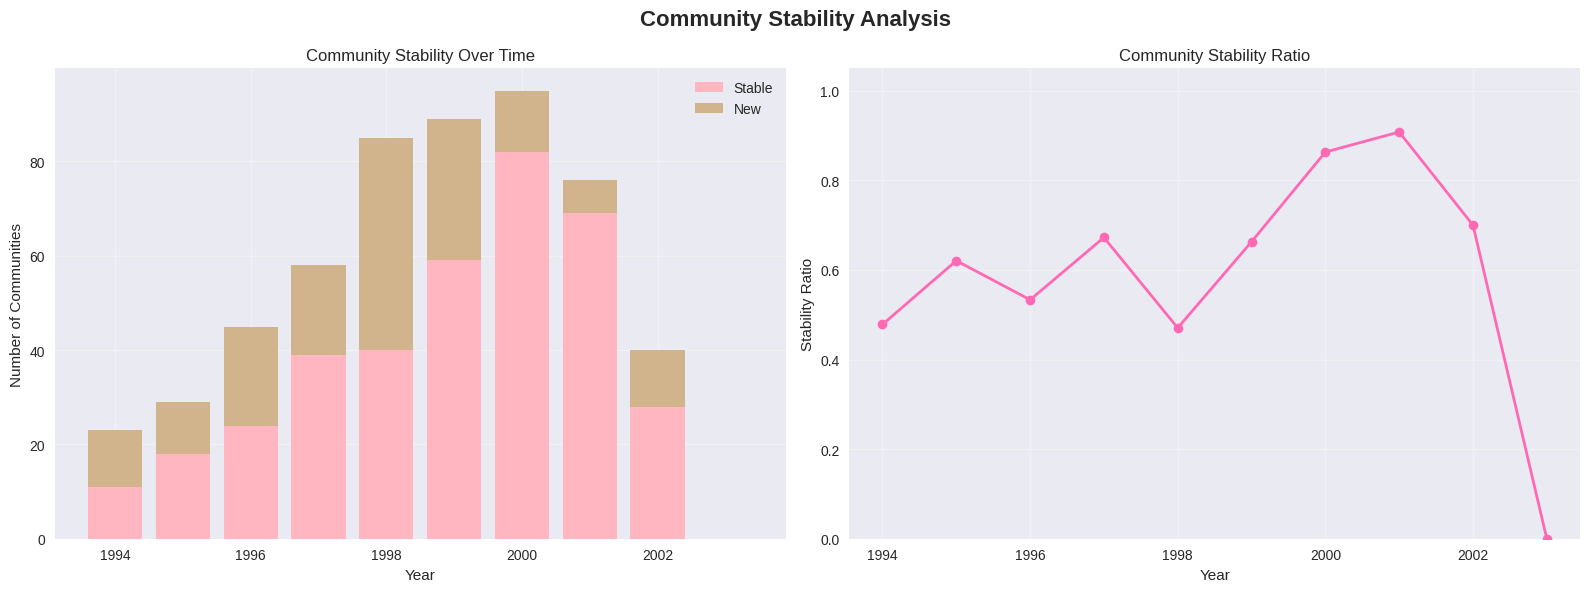


Running advanced analyses...

Analyzing community evolution patterns...


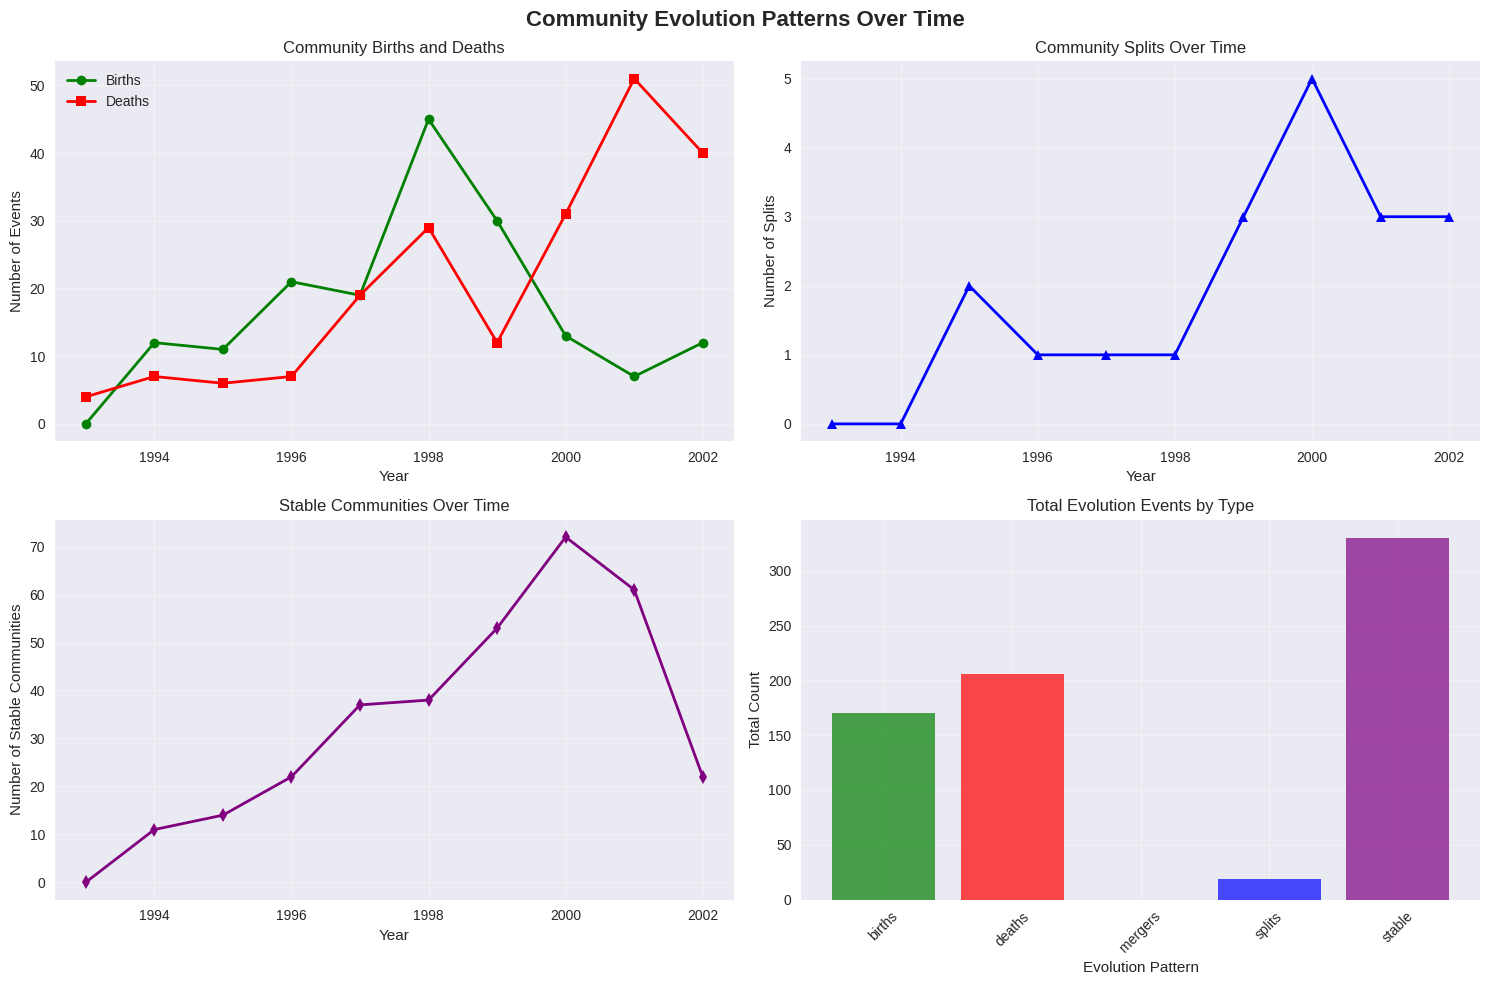


Community Evolution Summary:
  Births: 170 events
  Deaths: 206 events
  Mergers: 0 events
  Splits: 19 events
  Stable: 330 events

Computing network resilience metrics...


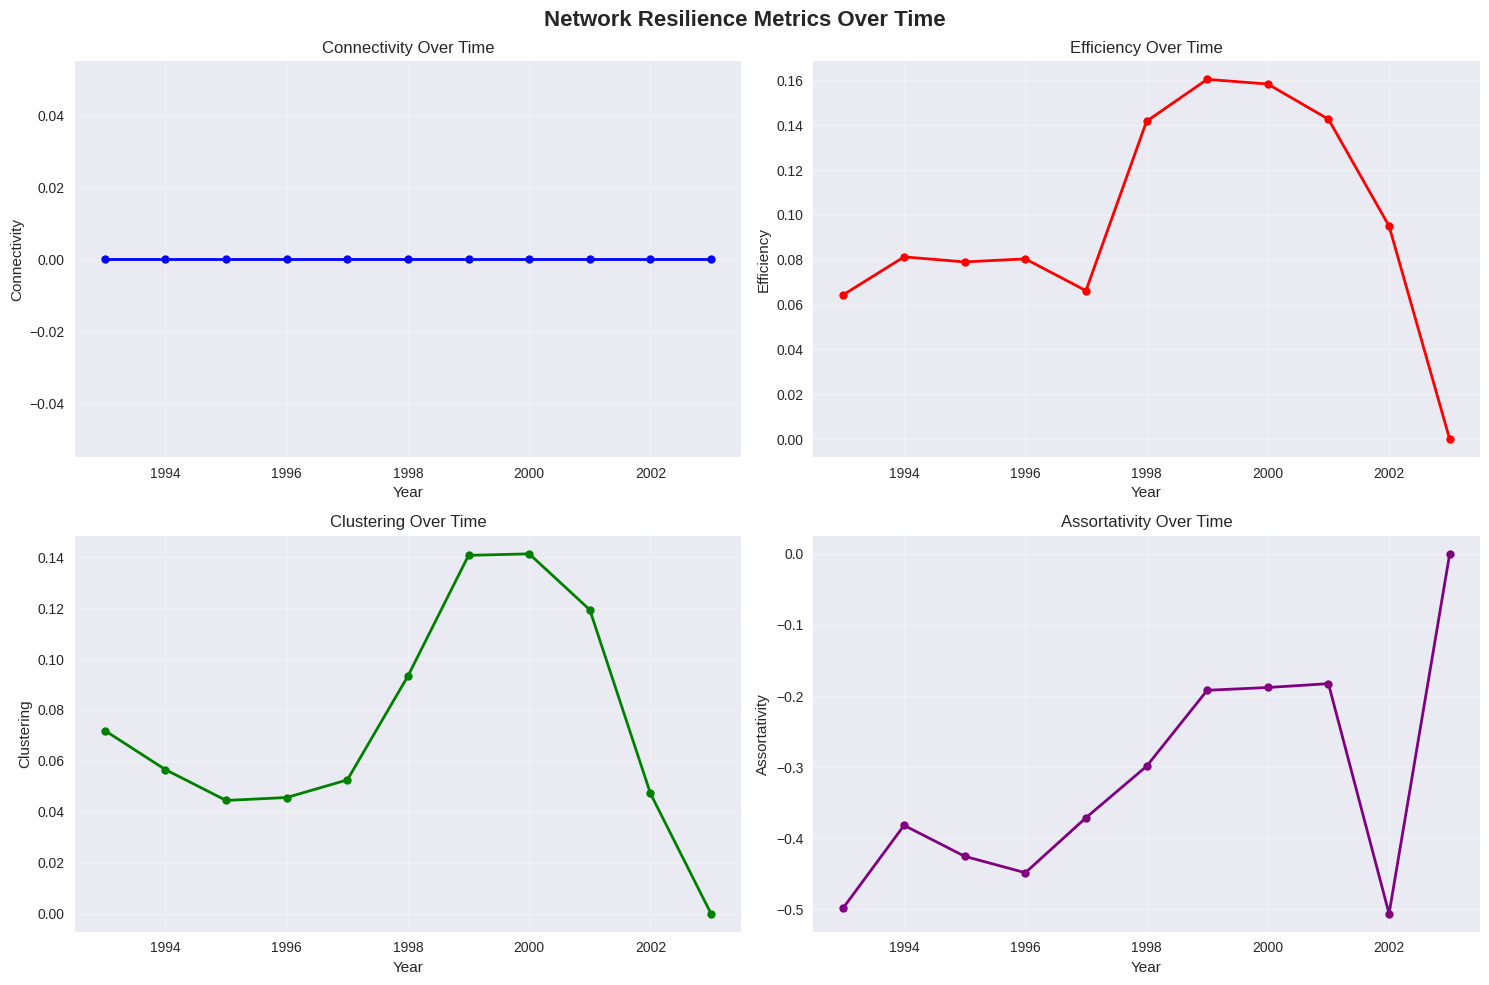


Analysis Results Summary:
- Analyzed 11 time periods
- Total unique papers: 16965
- Total citations: 27146
- Total communities detected: 555
- Years with community data: 10
- Average nodes per year: 1542.3
- Average edges per year: 2467.8
- Average network density: 0.0019


In [7]:
# Import Libraries
import networkx as nx
import pandas as pd
from collections import defaultdict
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for publication-quality figures
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load and Preprocess the Citation Network
def load_and_preprocess_data():
    """Load and preprocess citation network data from the High Energy Physics Theory corpus.
    This function creates a temporal citation network by merging edge data with publication years."""
    print("Loading citation network data...")

    # Load citation edges - represents the directed network of paper citations
    edges_df = pd.read_csv("Cit-HepTh.txt", comment='#', sep='\t', names=['source', 'target'])

    # Load metadata with year information to enable temporal analysis
    merged_df = pd.read_csv("/content/metadata_with_dates.csv")

    # Merge year information to create temporal context for each citation
    edges_df = pd.merge(edges_df, merged_df[['paper_id', 'year']],
                       left_on='source', right_on='paper_id', how='left')
    edges_df = edges_df.drop(columns=['paper_id'])

    # Filter by year range to focus on a specific research period (include all years up to 2003)
    edges_df = edges_df[(edges_df['year'] >= 1992) & (edges_df['year'] <= 2003)]

    print(f"Loaded {len(edges_df)} citation edges from {edges_df['year'].min()} to {edges_df['year'].max()}")
    return edges_df

# Build Yearly Graphs
def build_yearly_graphs(df, window=3):
    """Build citation graphs for each time window using a sliding window approach.
    The window parameter controls temporal granularity - larger windows capture longer-term patterns."""
    print(f"Building yearly graphs with window size {window}...")

    yearly_graphs = {}
    years = sorted(df['year'].unique())

    # Ensure we process all years from start to end, maintaining temporal continuity
    start_year = int(min(years))
    end_year = 2003  # Force it to go up to 2003

    for start in range(start_year, end_year + 1):
      print(f"Processing years from {start_year} to {end_year}")
      print(f"Available years in data: {sorted(years)}")

    # Process each year as a starting point for the window
    # This sliding window approach captures evolving citation patterns over time
    for start in range(start_year, end_year + 1):
        end_window = min(start + window, end_year + 1)
        window_edges = df[(df['year'] >= start) & (df['year'] < end_window)]

        # Create graph even if we have few edges (important for studying field emergence/decline)
        G = nx.DiGraph()
        if len(window_edges) > 0:
            G.add_edges_from(window_edges[['source', 'target']].values)

        yearly_graphs[start] = G
        print(f"  Year {start} (window {start}-{end_window-1}): {len(G.nodes())} nodes, {len(G.edges())} edges")

    return yearly_graphs

# Community Detection
def detect_communities(G):
    """Detect research communities using modularity optimization algorithms.
    Communities represent clusters of papers with high internal citation density, indicating shared research topics."""
    if len(G.nodes()) == 0:
        return {}

    # Convert to undirected for community detection (citations indicate bidirectional research relationships)
    undirected = G.to_undirected()

    # Use NetworkX's Louvain implementation for robust community detection
    try:
        # Try greedy modularity communities first (more stable and widely used in scientometrics)
        communities = nx_comm.greedy_modularity_communities(undirected)

        # Convert to partition dictionary for easier manipulation
        partition = {}
        for i, community in enumerate(communities):
            for node in community:
                partition[node] = i

        return partition
    except:
        # Fallback to simpler label propagation if Louvain fails
        try:
            communities = nx_comm.label_propagation_communities(undirected)
            partition = {}
            for i, community in enumerate(communities):
                for node in community:
                    partition[node] = i
            return partition
        except:
            # Last resort: each node is its own community (extreme fragmentation scenario)
            return {node: i for i, node in enumerate(G.nodes())}

# Community Matching
def jaccard_similarity(set1, set2):
    """Calculate Jaccard similarity between two sets using intersection over union.
    This metric quantifies overlap between communities across time periods."""
    if len(set1 | set2) == 0:
        return 0
    return len(set1 & set2) / len(set1 | set2)

def match_communities(prev_part, curr_part):
    """Match communities between consecutive time periods using maximum Jaccard similarity.
    This enables tracking of community evolution, merging, splitting, and emergence over time."""
    matches = {}
    prev_comms = defaultdict(set)
    curr_comms = defaultdict(set)

    # Group nodes by their community assignments
    for n, c in prev_part.items():
        prev_comms[c].add(n)
    for n, c in curr_part.items():
        curr_comms[c].add(n)

    # Find best matches based on member overlap (Jaccard similarity)
    for curr_id, curr_nodes in curr_comms.items():
        best_score = 0
        best_match = None
        for prev_id, prev_nodes in prev_comms.items():
            score = jaccard_similarity(prev_nodes, curr_nodes)
            if score > best_score and score > 0.1:  # Minimum similarity threshold to avoid spurious matches
                best_score = score
                best_match = prev_id
        matches[curr_id] = best_match

    return matches

# Compute Structural Metrics
def compute_modularity(G, partition):
    """Compute modularity score for a partition, measuring quality of community structure.
    Higher modularity indicates stronger within-community connections relative to between-community connections."""
    if len(G.nodes()) == 0 or len(partition) == 0:
        return 0

    try:
        # Convert partition to list of sets for NetworkX compatibility
        communities = defaultdict(set)
        for node, comm in partition.items():
            communities[comm].add(node)

        community_list = list(communities.values())
        return nx_comm.modularity(G, community_list)
    except:
        return 0

def compute_metrics(G, partition):
    """Compute structural metrics for each community to characterize their internal organization.
    These metrics reveal how tightly knit each research community is and their internal connectivity patterns."""
    comm_metrics = defaultdict(dict)

    if len(partition) == 0:
        return comm_metrics

    for comm_id in set(partition.values()):
        nodes = [n for n in partition if partition[n] == comm_id]
        subgraph = G.subgraph(nodes)

        # Community size - indicates scope of research area
        comm_metrics[comm_id]['size'] = len(nodes)

        # Overall modularity (same for all communities in this implementation)
        comm_metrics[comm_id]['modularity'] = compute_modularity(G.to_undirected(), partition)

        # Average betweenness centrality within community - measures information flow patterns
        if len(nodes) > 1:
            try:
                betweenness = nx.betweenness_centrality(subgraph)
                comm_metrics[comm_id]['avg_betweenness'] = sum(betweenness.values()) / len(nodes)
            except:
                comm_metrics[comm_id]['avg_betweenness'] = 0
        else:
            comm_metrics[comm_id]['avg_betweenness'] = 0

        # Average degree centrality within community - measures local connectivity
        if len(nodes) > 1:
            try:
                centrality = nx.degree_centrality(subgraph)
                comm_metrics[comm_id]['avg_centrality'] = sum(centrality.values()) / len(nodes)
            except:
                comm_metrics[comm_id]['avg_centrality'] = 0
        else:
            comm_metrics[comm_id]['avg_centrality'] = 0

    return comm_metrics

# Meta-Graph Construction
def build_meta_graph(G, partition):
    """Build meta-graph showing inter-community citations as weighted edges.
    This reveals knowledge transfer patterns and interdisciplinary collaborations between research areas."""
    meta_edges = defaultdict(int)

    # Count citations between different communities
    for u, v in G.edges():
        cu, cv = partition.get(u), partition.get(v)
        if cu is not None and cv is not None and cu != cv:
            meta_edges[(cu, cv)] += 1

    # Create weighted directed graph of inter-community relationships
    metaG = nx.DiGraph()
    for (cu, cv), w in meta_edges.items():
        metaG.add_edge(cu, cv, weight=w)

    return metaG

# --- Step 8: Self-Citation Ratio ---
def compute_self_citation_ratio(G, partition):
    """Compute self-citation ratios for each community to measure insularity vs openness.
    High self-citation ratios may indicate isolated research areas or highly specialized fields."""
    comm_citations = defaultdict(lambda: {'intra': 0, 'total': 0})

    # Count internal vs external citations for each community
    for u, v in G.edges():
        cu, cv = partition.get(u), partition.get(v)
        if cu is None or cv is None:
            continue
        comm_citations[cu]['total'] += 1
        if cu == cv:  # Self-citation within community
            comm_citations[cu]['intra'] += 1

    # Calculate ratios - higher values indicate more insular communities
    ratios = {c: d['intra']/d['total'] for c, d in comm_citations.items() if d['total'] > 0}
    return ratios

# VISUALIZATION

def plot_temporal_metrics(yearly_graphs, yearly_partitions, yearly_metrics):
    """Plot temporal evolution of key network metrics to reveal field development patterns.
    These visualizations show how the research landscape changes in terms of community structure and connectivity."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Temporal Evolution of Community Metrics', fontsize=16, fontweight='bold')

    years = sorted(yearly_graphs.keys())

    # Community count over time - shows field fragmentation or consolidation
    community_counts = [len(set(yearly_partitions[year].values())) if yearly_partitions[year] else 0 for year in years]
    axes[0, 0].plot(years, community_counts, marker='o', linewidth=2, markersize=6)
    axes[0, 0].set_title('Number of Communities Over Time')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Community Count')
    axes[0, 0].grid(True, alpha=0.3)

    # Average community size over time - indicates typical research group scale
    avg_sizes = []
    for year in years:
        partition = yearly_partitions[year]
        if partition:
            comm_sizes = [list(partition.values()).count(comm_id) for comm_id in set(partition.values())]
            avg_sizes.append(np.mean(comm_sizes))
        else:
            avg_sizes.append(0)

    axes[0, 1].plot(years, avg_sizes, marker='s', color='orange', linewidth=2, markersize=6)
    axes[0, 1].set_title('Average Community Size Over Time')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Average Size')
    axes[0, 1].grid(True, alpha=0.3)

    # Modularity over time - measures strength of community structure
    modularities = []
    for year in years:
        G = yearly_graphs[year].to_undirected()
        partition = yearly_partitions[year]
        if len(G.nodes()) > 0 and partition:
            mod = compute_modularity(G, partition)
            modularities.append(mod)
        else:
            modularities.append(0)

    axes[1, 0].plot(years, modularities, marker='^', color='green', linewidth=2, markersize=6)
    axes[1, 0].set_title('Network Modularity Over Time')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Modularity')
    axes[1, 0].grid(True, alpha=0.3)

    # Network density over time - shows overall connectivity trends
    densities = [nx.density(yearly_graphs[year]) for year in years]
    axes[1, 1].plot(years, densities, marker='d', color='red', linewidth=2, markersize=6)
    axes[1, 1].set_title('Network Density Over Time')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_self_citation_trends(yearly_graphs, yearly_partitions):
    """Plot self-citation ratios to analyze community insularity patterns over time.
    Self-citation analysis reveals whether research communities are becoming more isolated or interdisciplinary."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Self-Citation Analysis', fontsize=16, fontweight='bold')

    years = sorted(yearly_graphs.keys())
    avg_self_citation_ratios = []
    all_ratios = []
    year_labels = []

    # Calculate self-citation metrics for each year
    for year in years:
        G = yearly_graphs[year]
        partition = yearly_partitions[year]
        ratios = compute_self_citation_ratio(G, partition)

        if ratios:
            avg_ratio = np.mean(list(ratios.values()))
            avg_self_citation_ratios.append(avg_ratio)
            all_ratios.extend(list(ratios.values()))
            year_labels.extend([year] * len(ratios))
        else:
            avg_self_citation_ratios.append(0)

    # Average self-citation ratio over time - shows overall field insularity trends
    ax1.plot(years, avg_self_citation_ratios, marker='o', linewidth=2, markersize=6)
    ax1.set_title('Average Self-Citation Ratio Over Time')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Self-Citation Ratio')
    ax1.grid(True, alpha=0.3)

    # Box plot of self-citation ratios - shows distribution of community behaviors
    if all_ratios:
        df_ratios = pd.DataFrame({'Year': year_labels, 'Ratio': all_ratios})
        sns.boxplot(data=df_ratios, x='Year', y='Ratio', ax=ax2)
        ax2.set_title('Distribution of Self-Citation Ratios')
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Self-Citation Ratio')
        ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def classify_edge_growth(yearly_meta_graphs, year, u, v, prev_year=None):
    """
    Classify inter-community edge growth/decline for color coding
    Returns: 'growing', 'declining', 'stable', 'new'

    Args:
        yearly_meta_graphs: Dictionary of meta-graphs by year
        year: Current year
        u, v: Community IDs for the edge
        prev_year: Previous year to compare against
    """
    if prev_year is None or prev_year not in yearly_meta_graphs:
        return 'new'

    curr_metaG = yearly_meta_graphs[year]
    prev_metaG = yearly_meta_graphs[prev_year]

    # Get current and previous weights (citation counts between communities)
    curr_weight = curr_metaG[u][v]['weight'] if curr_metaG.has_edge(u, v) else 0
    prev_weight = prev_metaG[u][v]['weight'] if prev_metaG.has_edge(u, v) else 0

    if prev_weight == 0:
        return 'new'

    growth_rate = (curr_weight - prev_weight) / prev_weight

    if growth_rate > 0.2:  # 20% increase
        return 'growing'
    elif growth_rate < -0.2:  # 20% decrease
        return 'declining'
    else:
        return 'stable'

def build_yearly_meta_graphs(yearly_graphs, yearly_partitions):
    """
    Build meta-graphs for all years and store them for comparison
    """
    yearly_meta_graphs = {}

    for year in sorted(yearly_graphs.keys()):
        G = yearly_graphs[year]
        partition = yearly_partitions[year]

        if G and partition:
            metaG = build_meta_graph(G, partition)
            yearly_meta_graphs[year] = metaG
        else:
            yearly_meta_graphs[year] = nx.DiGraph()  # Empty graph

    return yearly_meta_graphs

def match_community_ids_across_years(yearly_partitions):
    """
    Create a mapping to track communities across years using consistent IDs
    This addresses the community ID mismatch problem
    """
    years = sorted(yearly_partitions.keys())
    community_mappings = {}  # year -> {old_id: new_consistent_id}
    next_global_id = 0

    for i, year in enumerate(years):
        partition = yearly_partitions[year]
        if not partition:
            community_mappings[year] = {}
            continue

        if i == 0:
            # First year: assign global IDs directly
            unique_comms = set(partition.values())
            mapping = {}
            for comm_id in sorted(unique_comms):
                mapping[comm_id] = next_global_id
                next_global_id += 1
            community_mappings[year] = mapping
        else:
            # Subsequent years: match communities and assign consistent IDs
            prev_year = years[i-1]
            prev_partition = yearly_partitions[prev_year]

            # Use the existing match_communities function
            matches = match_communities(prev_partition, partition)

            mapping = {}
            used_global_ids = set(community_mappings[prev_year].values())

            for curr_local_id, prev_local_id in matches.items():
                if prev_local_id is not None and prev_local_id in community_mappings[prev_year]:
                    # This community existed before - use its global ID
                    global_id = community_mappings[prev_year][prev_local_id]
                    mapping[curr_local_id] = global_id
                else:
                    # This is a new community - assign new global ID
                    while next_global_id in used_global_ids:
                        next_global_id += 1
                    mapping[curr_local_id] = next_global_id
                    next_global_id += 1

            community_mappings[year] = mapping

    return community_mappings

def plot_meta_graphs_all_years(yearly_graphs, yearly_partitions):
    """
    Meta-graph plotting with edges in uniform color and thickness proportional to weight.
    No classification coloring or legend.
    """
    available_years = [y for y in yearly_partitions.keys() if yearly_partitions[y]]

    if not available_years:
        print("No years with community data available")
        return

    # Build consistent community mappings across years
    community_mappings = match_community_ids_across_years(yearly_partitions)

    # Create consistent partitions using global community IDs
    consistent_partitions = {}
    for year in available_years:
        partition = yearly_partitions[year]
        mapping = community_mappings[year]
        consistent_partitions[year] = {
            node: mapping.get(local_id, local_id)
            for node, local_id in partition.items()
        }

    # Build meta-graphs
    yearly_meta_graphs = {}
    for year in available_years:
        G = yearly_graphs[year]
        partition = consistent_partitions[year]
        yearly_meta_graphs[year] = build_meta_graph(G, partition)

    n_years = len(available_years)
    n_cols = 3
    n_rows = (n_years + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7 * n_rows))
    fig.suptitle('Meta-Graph Analysis: Inter-Community Citation Dynamics',
                 fontsize=18, fontweight='bold', y=0.98)

    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()

    for i, year in enumerate(available_years):
        ax = axes_flat[i]
        metaG = yearly_meta_graphs[year]

        if len(metaG.nodes()) == 0:
            ax.text(0.5, 0.5, f'No inter-community\nedges for {year}',
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray'))
            ax.set_title(f'Year {year}', fontsize=14, fontweight='bold')
            ax.axis('off')
            continue

        pos = nx.spring_layout(metaG, k=3, iterations=100, seed=42)

        # Node sizes
        partition = consistent_partitions[year]
        node_sizes = [max(list(partition.values()).count(node) * 30, 100) for node in metaG.nodes()]

        nx.draw_networkx_nodes(metaG, pos,
                              node_size=node_sizes,
                              node_color='lightblue',
                              alpha=0.8,
                              edgecolors='navy',
                              linewidths=2,
                              ax=ax)

        # Edges: uniform color, weighted thickness
        for (u, v, data) in metaG.edges(data=True):
            weight = data['weight']
            thickness = max(1, min(8, weight / 5))

            nx.draw_networkx_edges(metaG, pos,
                                   edgelist=[(u, v)],
                                   width=thickness,
                                   edge_color='gray',
                                   alpha=0.7,
                                   arrows=True,
                                   arrowsize=15,
                                   arrowstyle='-|>',
                                   ax=ax)

        labels = {node: f'C{node}' for node in metaG.nodes()}
        nx.draw_networkx_labels(metaG, pos, labels, font_size=10, font_weight='bold', ax=ax)

        ax.set_title(f'Year {year}: {len(metaG.nodes())} communities, {len(metaG.edges())} edges',
                     fontsize=10, fontweight='bold')
        ax.axis('off')

    for i in range(len(available_years), len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.tight_layout()
    plt.show()


    # Print summary statistics about edge classifications
    print("\nEdge Classification Summary Across All Years:")
    total_classifications = {}
    for year in available_years[1:]:  # Skip first year (no comparison possible)
        metaG = yearly_meta_graphs[year]
        prev_year = available_years[available_years.index(year)-1]

        for u, v in metaG.edges():
            classification = classify_edge_growth(yearly_meta_graphs, year, u, v, prev_year)
            total_classifications[classification] = total_classifications.get(classification, 0) + 1

    for cls, count in total_classifications.items():
        print(f"  {cls.capitalize()}: {count} edges")


def extract_landmark_papers(metadata_df, year_range=None):
    """
    Extract landmark papers based on citation patterns and metadata
    This is a simplified version - in practice, you'd use more sophisticated metrics
    """
    landmarks = {}

    # Sample landmark papers for demonstration (replace with real analysis)
    sample_landmarks = {
        1993: [("hep-th/9301042", "AdS/CFT correspondence foundation")],
        1995: [("hep-th/9503124", "Matrix theory breakthrough")],
        1997: [("hep-th/9711200", "D-brane dynamics")],
        1998: [("hep-th/9802109", "Holographic principle")],
        2000: [("hep-th/0002016", "Large N gauge theories")],
        2002: [("hep-th/0201253", "String phenomenology")]
    }

    if year_range:
        landmarks = {year: papers for year, papers in sample_landmarks.items()
                    if year in year_range}
    else:
        landmarks = sample_landmarks

    return landmarks



def plot_annotated_temporal_metrics(yearly_graphs, yearly_partitions, yearly_metrics, metadata_df=None):
    """
    Enhanced temporal metrics plot with landmark paper annotations
    """
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('Temporal Evolution with Landmark Annotations', fontsize=18, fontweight='bold')

    years = sorted(yearly_graphs.keys())
    landmarks = extract_landmark_papers(metadata_df, years)

    # Community count over time
    community_counts = [len(set(yearly_partitions[year].values())) if yearly_partitions[year] else 0
                       for year in years]
    axes[0, 0].plot(years, community_counts, marker='o', linewidth=3, markersize=8, color='#2E86AB')
    axes[0, 0].set_title('Number of Communities Over Time', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Year', fontsize=12)
    axes[0, 0].set_ylabel('Community Count', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)

    # Annotate spikes/drops
    for i in range(1, len(community_counts)-1):
        if community_counts[i] > community_counts[i-1] + 2:  # Significant increase
            axes[0, 0].annotate(f'Spike: +{community_counts[i]-community_counts[i-1]}',
                               xy=(years[i], community_counts[i]),
                               xytext=(years[i], community_counts[i]+1),
                               arrowprops=dict(arrowstyle='->', color='red', lw=2),
                               fontsize=10, ha='center',
                               bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

    # Average community size over time
    avg_sizes = []
    for year in years:
        partition = yearly_partitions[year]
        if partition:
            comm_sizes = [list(partition.values()).count(comm_id) for comm_id in set(partition.values())]
            avg_sizes.append(np.mean(comm_sizes))
        else:
            avg_sizes.append(0)

    axes[0, 1].plot(years, avg_sizes, marker='s', color='#A23B72', linewidth=3, markersize=8)
    axes[0, 1].set_title('Average Community Size Over Time', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Year', fontsize=12)
    axes[0, 1].set_ylabel('Average Size', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)

    # Modularity over time with landmark annotations
    modularities = []
    for year in years:
        G = yearly_graphs[year].to_undirected()
        partition = yearly_partitions[year]
        if len(G.nodes()) > 0 and partition:
            mod = compute_modularity(G, partition)
            modularities.append(mod)
        else:
            modularities.append(0)

    axes[1, 0].plot(years, modularities, marker='^', color='#F18F01', linewidth=3, markersize=8)
    axes[1, 0].set_title('Network Modularity Over Time', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Year', fontsize=12)
    axes[1, 0].set_ylabel('Modularity', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3)

    # Add landmark annotations
    for year, papers in landmarks.items():
        if year in years:
            year_idx = years.index(year)
            if year_idx < len(modularities):
                for paper_id, description in papers:
                    axes[1, 0].annotate(f'{year}: {description}',
                                       xy=(year, modularities[year_idx]),
                                       xytext=(year + 0.5, modularities[year_idx] + 0.02),
                                       arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.5),
                                       fontsize=9,
                                       bbox=dict(boxstyle="round,pad=0.2", facecolor='lightgreen', alpha=0.7))

    # Network density over time
    densities = [nx.density(yearly_graphs[year]) for year in years]
    axes[1, 1].plot(years, densities, marker='d', color='#C73E1D', linewidth=3, markersize=8)
    axes[1, 1].set_title('Network Density Over Time', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Year', fontsize=12)
    axes[1, 1].set_ylabel('Density', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3)

    # Highlight periods of rapid change
    for i in range(1, len(densities)):
        change = abs(densities[i] - densities[i-1])
        if change > 0.001:  # Significant density change
            axes[1, 1].axvspan(years[i-1], years[i], alpha=0.2, color='orange')

    plt.tight_layout()
    plt.show()

def plot_meta_graph_statistics(yearly_graphs, yearly_partitions):
    """Plot statistical analysis of meta-graphs to quantify inter-community interaction patterns.
    These metrics reveal the intensity and distribution of knowledge transfer between research areas."""
    available_years = [y for y in yearly_partitions.keys() if yearly_partitions[y]]

    if not available_years:
        print("No years with community data available")
        return

    # Collect comprehensive meta-graph statistics
    meta_stats = {
        'year': [],
        'num_communities': [],
        'inter_community_edges': [],
        'avg_edge_weight': [],
        'max_edge_weight': [],
        'meta_density': []
    }

    for year in available_years:
        G = yearly_graphs[year]
        partition = yearly_partitions[year]
        metaG = build_meta_graph(G, partition)

        meta_stats['year'].append(year)
        meta_stats['num_communities'].append(len(metaG.nodes()))
        meta_stats['inter_community_edges'].append(len(metaG.edges()))

        # Calculate citation strength statistics between communities
        if len(metaG.edges()) > 0:
            edge_weights = [metaG[u][v]['weight'] for u, v in metaG.edges()]
            meta_stats['avg_edge_weight'].append(np.mean(edge_weights))
            meta_stats['max_edge_weight'].append(np.max(edge_weights))
            meta_stats['meta_density'].append(nx.density(metaG))
        else:
            meta_stats['avg_edge_weight'].append(0)
            meta_stats['max_edge_weight'].append(0)
            meta_stats['meta_density'].append(0)

    # Create comprehensive visualization dashboard
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Meta-Graph Statistics Over Time', fontsize=16, fontweight='bold')

    # Number of communities with inter-community connections
    axes[0, 0].plot(meta_stats['year'], meta_stats['num_communities'],
                   marker='o', linewidth=2, markersize=6)
    axes[0, 0].set_title('Communities with Inter-Community Links')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Number of Communities')
    axes[0, 0].grid(True, alpha=0.3)

    # Number of inter-community edges - measures interdisciplinary activity
    axes[0, 1].plot(meta_stats['year'], meta_stats['inter_community_edges'],
                   marker='s', color='orange', linewidth=2, markersize=6)
    axes[0, 1].set_title('Inter-Community Edges Over Time')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Number of Edges')
    axes[0, 1].grid(True, alpha=0.3)

    # Average edge weight - shows typical citation strength between fields
    axes[0, 2].plot(meta_stats['year'], meta_stats['avg_edge_weight'],
                   marker='^', color='green', linewidth=2, markersize=6)
    axes[0, 2].set_title('Average Inter-Community Citation Strength')
    axes[0, 2].set_xlabel('Year')
    axes[0, 2].set_ylabel('Average Citations')
    axes[0, 2].grid(True, alpha=0.3)

    # Maximum edge weight - identifies strongest inter-field connections
    axes[1, 0].plot(meta_stats['year'], meta_stats['max_edge_weight'],
                   marker='d', color='red', linewidth=2, markersize=6)
    axes[1, 0].set_title('Maximum Inter-Community Citation Strength')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Maximum Citations')
    axes[1, 0].grid(True, alpha=0.3)

    # Meta-graph density - overall interdisciplinary connectivity
    axes[1, 1].plot(meta_stats['year'], meta_stats['meta_density'],
                   marker='*', color='purple', linewidth=2, markersize=8)
    axes[1, 1].set_title('Meta-Graph Density Over Time')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].grid(True, alpha=0.3)

    # Combined view: communities vs inter-community connections
    ax2 = axes[1, 2]
    ax2_twin = ax2.twinx()

    line1 = ax2.plot(meta_stats['year'], meta_stats['num_communities'],
                    marker='o', color='blue', linewidth=2, label='Communities')
    line2 = ax2_twin.plot(meta_stats['year'], meta_stats['inter_community_edges'],
                         marker='s', color='red', linewidth=2, label='Inter-edges')

    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Communities', color='blue')
    ax2_twin.set_ylabel('Inter-Community Edges', color='red')
    ax2.set_title('Communities vs Inter-Community Connections')
    ax2.grid(True, alpha=0.3)

    # Add legend for dual-axis plot
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()

def plot_community_size_distributions(yearly_partitions):
    """Plot community size distributions to reveal structural patterns in research organization.
    Size distributions show whether the field is dominated by large groups or many small specialized areas."""
    years = sorted(yearly_partitions.keys())  # Show all available years

    # Calculate subplot dimensions based on number of years
    n_years = len(years)
    n_cols = 3
    n_rows = (n_years + n_cols - 1) // n_cols  # Ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    fig.suptitle('Community Size Distributions Over Time', fontsize=16, fontweight='bold')

    # Flatten axes array for easier indexing
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()

    for i, year in enumerate(years):
        ax = axes_flat[i]
        partition = yearly_partitions[year]

        # Calculate and plot size distribution for each year
        if partition:
            comm_sizes = [list(partition.values()).count(comm_id) for comm_id in set(partition.values())]
            ax.hist(comm_sizes, bins=max(1, min(20, len(set(comm_sizes)))),
                   alpha=0.7, edgecolor='black')

        ax.set_title(f'Year {year}')
        ax.set_xlabel('Community Size')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)

    # Hide unused subplots for clean presentation
    for i in range(len(years), len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.tight_layout()
    plt.show()

def create_interactive_temporal_plot(yearly_graphs, yearly_partitions):
    """Create interactive temporal visualization using Plotly for dynamic exploration.
    Interactive plots allow researchers to explore relationships between different network metrics over time."""
    years = sorted(yearly_graphs.keys())

    # Prepare comprehensive temporal dataset
    data = {
        'Year': years,
        'Communities': [len(set(yearly_partitions[year].values())) if yearly_partitions[year] else 0 for year in years],
        'Nodes': [len(yearly_graphs[year].nodes()) for year in years],
        'Edges': [len(yearly_graphs[year].edges()) for year in years],
        'Density': [nx.density(yearly_graphs[year]) for year in years]
    }

    df = pd.DataFrame(data)

    # Create multi-panel interactive dashboard
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Number of Communities', 'Network Size (Nodes)',
                       'Network Size (Edges)', 'Network Density'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )

    # Add interactive time series traces
    fig.add_trace(
        go.Scatter(x=df['Year'], y=df['Communities'], mode='lines+markers',
                  name='Communities', line=dict(color='blue')),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=df['Year'], y=df['Nodes'], mode='lines+markers',
                  name='Nodes', line=dict(color='red')),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=df['Year'], y=df['Edges'], mode='lines+markers',
                  name='Edges', line=dict(color='green')),
        row=2, col=1
    )

    fig.add_trace(
        go.Scatter(x=df['Year'], y=df['Density'], mode='lines+markers',
                  name='Density', line=dict(color='orange')),
        row=2, col=2
    )

    fig.update_layout(
        title_text="Interactive Citation Network Analysis",
        showlegend=False,
        height=600
    )

    fig.show()

# Import scipy for statistical analysis
from scipy.stats import skew

def plot_inter_community_citation_histograms(yearly_graphs, yearly_partitions):
    """
    Display inter-community citation histograms for multiple years in a grid layout.
    These distributions reveal the intensity patterns of knowledge transfer between research areas.
    """
    print("\nGenerating grid of inter-community citation histograms...")

    all_years = sorted(yearly_graphs.keys())
    plots_data = []

    # Collect citation weights and statistical measures for each year
    for year in all_years:
        G = yearly_graphs[year]
        partition = yearly_partitions.get(year, {})

        if not G or not partition:
            continue

        metaG = build_meta_graph(G, partition)
        if len(metaG.edges()) == 0:
            continue

        # Extract citation weights between communities
        weights = [metaG[u][v]['weight'] for u, v in metaG.edges()]
        if len(weights) == 0:
            continue

        # Calculate distribution statistics for scientific analysis
        stats = {
            'year': year,
            'weights': weights,
            'mean': np.mean(weights),
            'median': np.median(weights),
            'skewness': skew(weights)  # Measures asymmetry in citation patterns
        }
        plots_data.append(stats)

    if not plots_data:
        print("No valid data for inter-community histograms.")
        return

    # Create grid layout for temporal comparison
    n_years = len(plots_data)
    n_cols = 3
    n_rows = (n_years + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
    fig.suptitle("Inter-Community Citation Distributions Over Time", fontsize=18, fontweight='bold')

    # Flatten axes for flexible indexing
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    for i, data in enumerate(plots_data):
        ax = axes[i]
        # Plot distribution with clear visual encoding
        ax.hist(data['weights'], bins=15, color='lightcoral', edgecolor='black', alpha=0.75)
        ax.set_title(f"Year {data['year']}")
        ax.set_xlabel("Citations")
        ax.set_ylabel("Frequency")
        ax.grid(True, alpha=0.3)

        # Add statistical summary box for quantitative analysis
        stats_text = f"Mean: {data['mean']:.1f}\nMedian: {data['median']:.1f}\nSkew: {data['skewness']:.2f}"
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                fontsize=9, ha='right', va='top',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.6))

    # Hide any unused subplots for clean presentation
    for i in range(len(plots_data), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    plt.show()

def plot_community_stability(yearly_partitions):
    """
    Analyze and visualize community stability patterns over time.
    Stability analysis reveals whether research communities persist, merge, split, or disappear over time.
    """
    print("\nGenerating Community Stability Analysis...")

    years = sorted(yearly_partitions.keys())
    stability_ratios = []
    stable_counts = []
    new_counts = []

    # Calculate stability metrics by comparing consecutive years
    for i in range(1, len(years)):
        prev_year = years[i - 1]
        curr_year = years[i]

        prev_partition = yearly_partitions[prev_year]
        curr_partition = yearly_partitions[curr_year]

        # Match current communities to previous year using similarity measures
        matches = match_communities(prev_partition, curr_partition)

        # Count stable vs new communities based on matching results
        stable = 0
        total = len(set(curr_partition.values()))

        for node, comm in curr_partition.items():
            if matches.get(comm) == prev_partition.get(node):
                stable += 1

        # Classify communities as stable (matched) or new (unmatched)
        unique_curr_comms = set(curr_partition.values())
        matched_comms = set(matches.keys())
        stable_comms = sum(1 for comm in matched_comms if matches[comm] is not None)
        new_comms = len(unique_curr_comms) - stable_comms

        stable_counts.append(stable_comms)
        new_counts.append(new_comms)

        # Calculate overall stability ratio for temporal trends
        stability_ratio = stable_comms / total if total > 0 else 0
        stability_ratios.append(stability_ratio)

    # Create dual visualization: counts and ratios
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle("Community Stability Analysis", fontsize=16, fontweight='bold')

    # Stacked bar chart showing absolute numbers of stable vs new communities
    ax1.bar(years[1:], stable_counts, label='Stable', color='lightpink')
    ax1.bar(years[1:], new_counts, bottom=stable_counts, label='New', color='tan')
    ax1.set_title('Community Stability Over Time')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Communities')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Line chart showing stability ratio trends (proportion of stable communities)
    ax2.plot(years[1:], stability_ratios, marker='o', color='hotpink', linewidth=2)
    ax2.set_ylim(0, 1.05)
    ax2.set_title('Community Stability Ratio')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Stability Ratio')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# MAIN ANALYSIS PIPELINE
def run_citation_analysis():
    """Main function to run the complete citation network analysis pipeline.
    This orchestrates the entire workflow from data loading through community detection to visualization."""

    # Step 1: Load and prepare citation network data
    edges_df = load_and_preprocess_data()

    # Debug: Check what years are actually in the data
    print(f"\nYears available in dataset: {sorted(edges_df['year'].dropna().unique())}")
    print(f"Year range: {edges_df['year'].min()} to {edges_df['year'].max()}")

    # Step 2: Build temporal citation graphs using sliding windows
    yearly_graphs = build_yearly_graphs(edges_df, window=3)

    # Debug: Check what years we have graphs for
    print(f"\nYears with graphs created: {sorted(yearly_graphs.keys())}")

    # Step 3: Detect communities and compute structural metrics for each time period
    print("\nDetecting communities and computing metrics...")
    yearly_partitions = {}
    yearly_metrics = {}
    community_matches = {}

    for year in sorted(yearly_graphs.keys()):
        print(f"Processing year {year}...")
        G = yearly_graphs[year]

        # Detect research communities using modularity optimization
        partition = detect_communities(G)
        yearly_partitions[year] = partition

        # Compute structural and connectivity metrics
        metrics = compute_metrics(G, partition)
        yearly_metrics[year] = metrics

        # Track community evolution by matching with previous year
        prev_year = year - 1
        if prev_year in yearly_partitions and yearly_partitions[prev_year]:
            matches = match_communities(yearly_partitions[prev_year], partition)
            community_matches[year] = matches

        print(f"  Found {len(set(partition.values())) if partition else 0} communities")

    # Debug: Final check of what years we have partitions for
    print(f"\nYears with community partitions: {sorted(yearly_partitions.keys())}")

    # Step 4: Generate comprehensive visualizations for scientific analysis
    print("\nGenerating visualizations...")

    # Temporal metrics overview - shows field evolution patterns
    print("Creating temporal metrics plot...")
    plot_temporal_metrics(yearly_graphs, yearly_partitions, yearly_metrics)

    # Community size distributions - reveals organizational structure
    print("Creating community size distributions...")
    plot_community_size_distributions(yearly_partitions)

    # Self-citation analysis - measures community insularity
    print("Creating self-citation analysis...")
    plot_self_citation_trends(yearly_graphs, yearly_partitions)

    # Meta-graph analysis for all years - inter-community relationships
    print("Creating meta-graph analysis for all years...")
    plot_meta_graphs_all_years(yearly_graphs, yearly_partitions)

    plot_annotated_temporal_metrics(yearly_graphs, yearly_partitions, yearly_metrics, metadata_df)

    # Meta-graph statistics over time - quantitative interdisciplinary metrics
    print("Creating meta-graph statistics...")
    plot_meta_graph_statistics(yearly_graphs, yearly_partitions)

    # Inter-community citation distributions with statistical analysis
    print("Creating inter-community citation histograms with statistics...")
    plot_inter_community_citation_histograms(yearly_graphs, yearly_partitions)

    # Interactive visualization for dynamic exploration
    print("Creating interactive visualization...")
    create_interactive_temporal_plot(yearly_graphs, yearly_partitions)

    # Community stability analysis - tracks persistence and change
    print("Creating community stability plot...")
    plot_community_stability(yearly_partitions)

    return yearly_graphs, yearly_partitions, yearly_metrics, community_matches

# FallBack Community Detection Methods
def detect_communities_alternative(G, method='greedy'):
    """Alternative community detection methods for comparative analysis.
    Different algorithms may reveal different aspects of research community structure."""
    if len(G.nodes()) == 0:
        return {}

    # Convert to undirected for community detection algorithms
    undirected = G.to_undirected()

    try:
        if method == 'greedy':
            # Greedy modularity optimization - fast and widely used
            communities = nx_comm.greedy_modularity_communities(undirected)
        elif method == 'label_prop':
            # Label propagation - good for large networks
            communities = nx_comm.label_propagation_communities(undirected)
        elif method == 'girvan_newman':
            # Girvan-Newman algorithm - hierarchical community detection
            communities = next(nx_comm.girvan_newman(undirected))
        else:
            communities = nx_comm.greedy_modularity_communities(undirected)

        # Convert to partition dictionary for consistent interface
        partition = {}
        for i, community in enumerate(communities):
            for node in community:
                partition[node] = i

        return partition
    except Exception as e:
        print(f"Community detection failed: {e}")
        # Fallback: each node is its own community (extreme fragmentation scenario)
        return {node: i for i, node in enumerate(G.nodes())}

# ANALYSIS FUNCTIONS

def analyze_community_evolution_patterns(yearly_partitions, community_matches):
    """Analyze and categorize different types of community evolution patterns.
    This function identifies birth, death, merging, splitting, and growth/decline of research communities."""
    print("\nAnalyzing community evolution patterns...")

    evolution_patterns = {
        'births': [],       # New communities appearing
        'deaths': [],       # Communities disappearing
        'mergers': [],      # Multiple communities combining
        'splits': [],       # Single community dividing
        'stable': []        # Communities persisting with minimal change
    }

    years = sorted(yearly_partitions.keys())

    for i in range(1, len(years)):
        prev_year = years[i-1]
        curr_year = years[i]

        if curr_year not in community_matches:
            continue

        matches = community_matches[curr_year]
        prev_partition = yearly_partitions[prev_year]
        curr_partition = yearly_partitions[curr_year]

        # Reverse mapping to find what happened to previous communities
        prev_to_curr = defaultdict(list)
        for curr_comm, prev_comm in matches.items():
            if prev_comm is not None:
                prev_to_curr[prev_comm].append(curr_comm)

        # Analyze evolution patterns
        for curr_comm, prev_comm in matches.items():
            if prev_comm is None:
                # New community (birth)
                evolution_patterns['births'].append((curr_year, curr_comm))
            elif len(prev_to_curr[prev_comm]) == 1:
                # One-to-one mapping (stable or evolved)
                evolution_patterns['stable'].append((curr_year, curr_comm, prev_comm))

        # Check for deaths (previous communities with no matches)
        matched_prev = set(m for m in matches.values() if m is not None)
        for prev_comm in set(prev_partition.values()):
            if prev_comm not in matched_prev:
                evolution_patterns['deaths'].append((prev_year, prev_comm))

        # Check for splits and mergers
        for prev_comm, curr_comms in prev_to_curr.items():
            if len(curr_comms) > 1:
                evolution_patterns['splits'].append((curr_year, prev_comm, curr_comms))

    return evolution_patterns

def plot_evolution_patterns(evolution_patterns):
    """Visualize community evolution patterns over time.
    This shows the dynamics of research field development through births, deaths, mergers, and splits."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Community Evolution Patterns Over Time', fontsize=16, fontweight='bold')

    # Extract years and counts for each pattern type
    years = sorted(set([year for pattern_list in evolution_patterns.values()
                       for item in pattern_list for year in [item[0]] if isinstance(item[0], (int, float))]))

    # Count events by year for each pattern type
    pattern_counts = {pattern: [0] * len(years) for pattern in evolution_patterns.keys()}

    for pattern_type, events in evolution_patterns.items():
        for event in events:
            if len(event) > 0 and event[0] in years:
                year_idx = years.index(event[0])
                pattern_counts[pattern_type][year_idx] += 1

    # Plot births and deaths
    axes[0, 0].plot(years, pattern_counts['births'], marker='o', color='green',
                   linewidth=2, label='Births')
    axes[0, 0].plot(years, pattern_counts['deaths'], marker='s', color='red',
                   linewidth=2, label='Deaths')
    axes[0, 0].set_title('Community Births and Deaths')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Number of Events')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot splits and mergers
    axes[0, 1].plot(years, pattern_counts['splits'], marker='^', color='blue',
                   linewidth=2, label='Splits')
    axes[0, 1].set_title('Community Splits Over Time')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Number of Splits')
    axes[0, 1].grid(True, alpha=0.3)

    # Plot stable communities
    axes[1, 0].plot(years, pattern_counts['stable'], marker='d', color='purple',
                   linewidth=2)
    axes[1, 0].set_title('Stable Communities Over Time')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Number of Stable Communities')
    axes[1, 0].grid(True, alpha=0.3)

    # Summary statistics
    axes[1, 1].bar(evolution_patterns.keys(),
                  [len(events) for events in evolution_patterns.values()],
                  color=['green', 'red', 'orange', 'blue', 'purple'], alpha=0.7)
    axes[1, 1].set_title('Total Evolution Events by Type')
    axes[1, 1].set_xlabel('Evolution Pattern')
    axes[1, 1].set_ylabel('Total Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nCommunity Evolution Summary:")
    for pattern, events in evolution_patterns.items():
        print(f"  {pattern.capitalize()}: {len(events)} events")

def compute_network_resilience_metrics(yearly_graphs):
    """Compute network resilience metrics to understand robustness of citation networks.
    Resilience metrics reveal how well the research network maintains connectivity under perturbations."""
    print("\nComputing network resilience metrics...")

    resilience_metrics = {}
    years = sorted(yearly_graphs.keys())

    for year in years:
        G = yearly_graphs[year]

        if len(G.nodes()) == 0:
            resilience_metrics[year] = {
                'connectivity': 0,
                'efficiency': 0,
                'clustering': 0,
                'assortativity': 0
            }
            continue

        # Convert to undirected for resilience calculations
        G_undirected = G.to_undirected()

        # Global connectivity measures
        connectivity = nx.node_connectivity(G_undirected) if len(G_undirected.nodes()) > 1 else 0

        # Global efficiency (average inverse shortest path length)
        try:
            efficiency = nx.global_efficiency(G_undirected)
        except:
            efficiency = 0

        # Average clustering coefficient
        clustering = nx.average_clustering(G_undirected)

        # Degree assortativity (tendency for similar-degree nodes to connect)
        try:
            assortativity = nx.degree_assortativity_coefficient(G_undirected)
        except:
            assortativity = 0

        resilience_metrics[year] = {
            'connectivity': connectivity,
            'efficiency': efficiency,
            'clustering': clustering,
            'assortativity': assortativity
        }

    return resilience_metrics

def plot_resilience_metrics(resilience_metrics):
    """Plot network resilience metrics over time to show structural robustness trends.
    These metrics indicate how well the citation network can withstand disruptions or attacks."""
    years = sorted(resilience_metrics.keys())

    metrics = ['connectivity', 'efficiency', 'clustering', 'assortativity']

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Network Resilience Metrics Over Time', fontsize=16, fontweight='bold')

    axes_flat = axes.flatten()
    colors = ['blue', 'red', 'green', 'purple']

    for i, metric in enumerate(metrics):
        values = [resilience_metrics[year][metric] for year in years]

        axes_flat[i].plot(years, values, marker='o', color=colors[i],
                         linewidth=2, markersize=6)
        axes_flat[i].set_title(f'{metric.capitalize()} Over Time')
        axes_flat[i].set_xlabel('Year')
        axes_flat[i].set_ylabel(metric.capitalize())
        axes_flat[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# RUN ANALYSIS
if __name__ == "__main__":
    print("Starting Citation Network Analysis...")


    # Execute the complete citation network analysis pipeline
    yearly_graphs, yearly_partitions, yearly_metrics, community_matches = run_citation_analysis()

    # Additional advanced analyses
    print("\nRunning advanced analyses...")

    # Community evolution pattern analysis
    evolution_patterns = analyze_community_evolution_patterns(yearly_partitions, community_matches)
    plot_evolution_patterns(evolution_patterns)

    # Network resilience analysis
    resilience_metrics = compute_network_resilience_metrics(yearly_graphs)
    plot_resilience_metrics(resilience_metrics)

    # Generate comprehensive summary of analysis results
    print("\nAnalysis Results Summary:")
    print(f"- Analyzed {len(yearly_graphs)} time periods")
    print(f"- Total unique papers: {sum(len(G.nodes()) for G in yearly_graphs.values())}")
    print(f"- Total citations: {sum(len(G.edges()) for G in yearly_graphs.values())}")

    # Calculate aggregate community statistics across all years
    total_communities = sum(len(set(partition.values())) for partition in yearly_partitions.values() if partition)
    print(f"- Total communities detected: {total_communities}")

    # Report temporal coverage and data completeness
    years_with_data = len([y for y in yearly_partitions.keys() if yearly_partitions[y]])
    print(f"- Years with community data: {years_with_data}")

    # Report average network properties
    avg_nodes = np.mean([len(G.nodes()) for G in yearly_graphs.values()])
    avg_edges = np.mean([len(G.edges()) for G in yearly_graphs.values()])
    avg_density = np.mean([nx.density(G) for G in yearly_graphs.values()])

    print(f"- Average nodes per year: {avg_nodes:.1f}")
    print(f"- Average edges per year: {avg_edges:.1f}")
    print(f"- Average network density: {avg_density:.4f}")

Starting Enhanced Citation Network Analysis...
Loading citation network data with field mapping...
Found field columns: ['field']
Loaded 9172 citation edges from 1993.0 to 2002.0
Fields found: ['cond-mat', 'hep-th', 'math-ph']
Building yearly graphs with window size 3...
Processing years from 1993 to 2003
Available years in data: [np.float64(1993.0), np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2000.0), np.float64(2001.0), np.float64(2002.0)]
Processing years from 1993 to 2003
Available years in data: [np.float64(1993.0), np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2000.0), np.float64(2001.0), np.float64(2002.0)]
Processing years from 1993 to 2003
Available years in data: [np.float64(1993.0), np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.fl

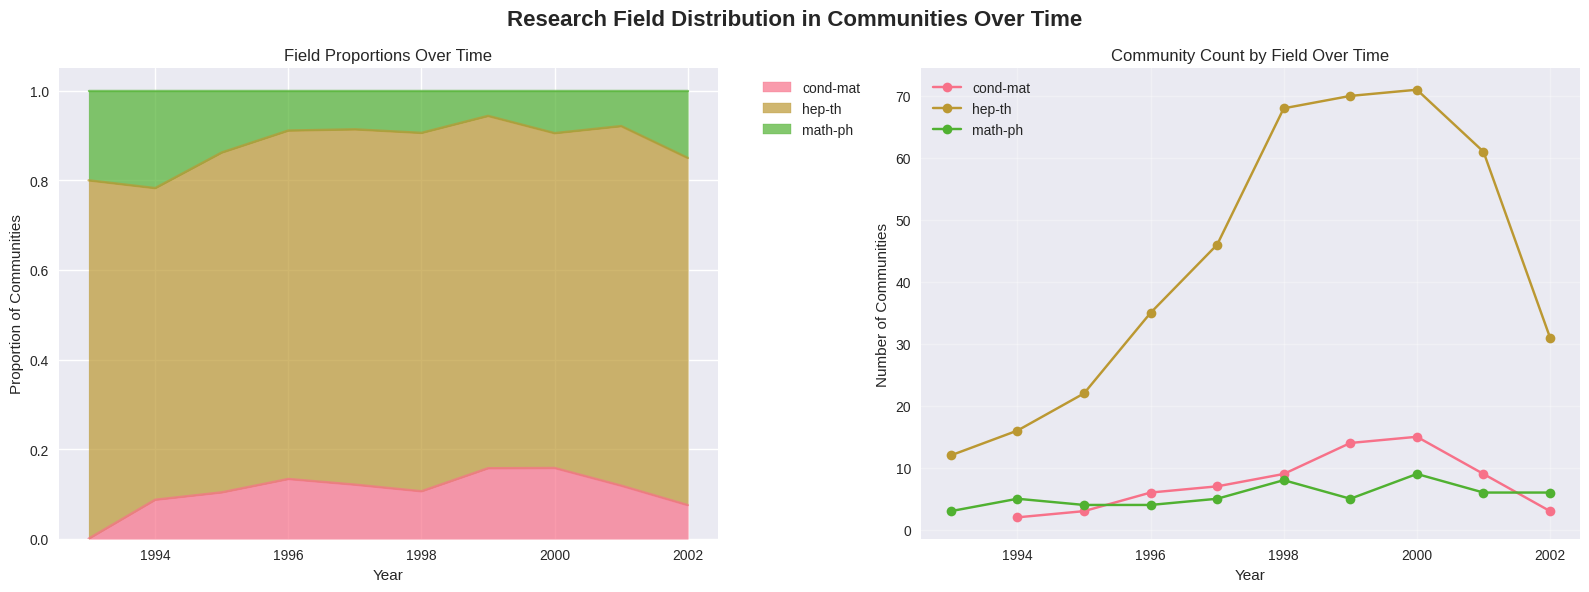

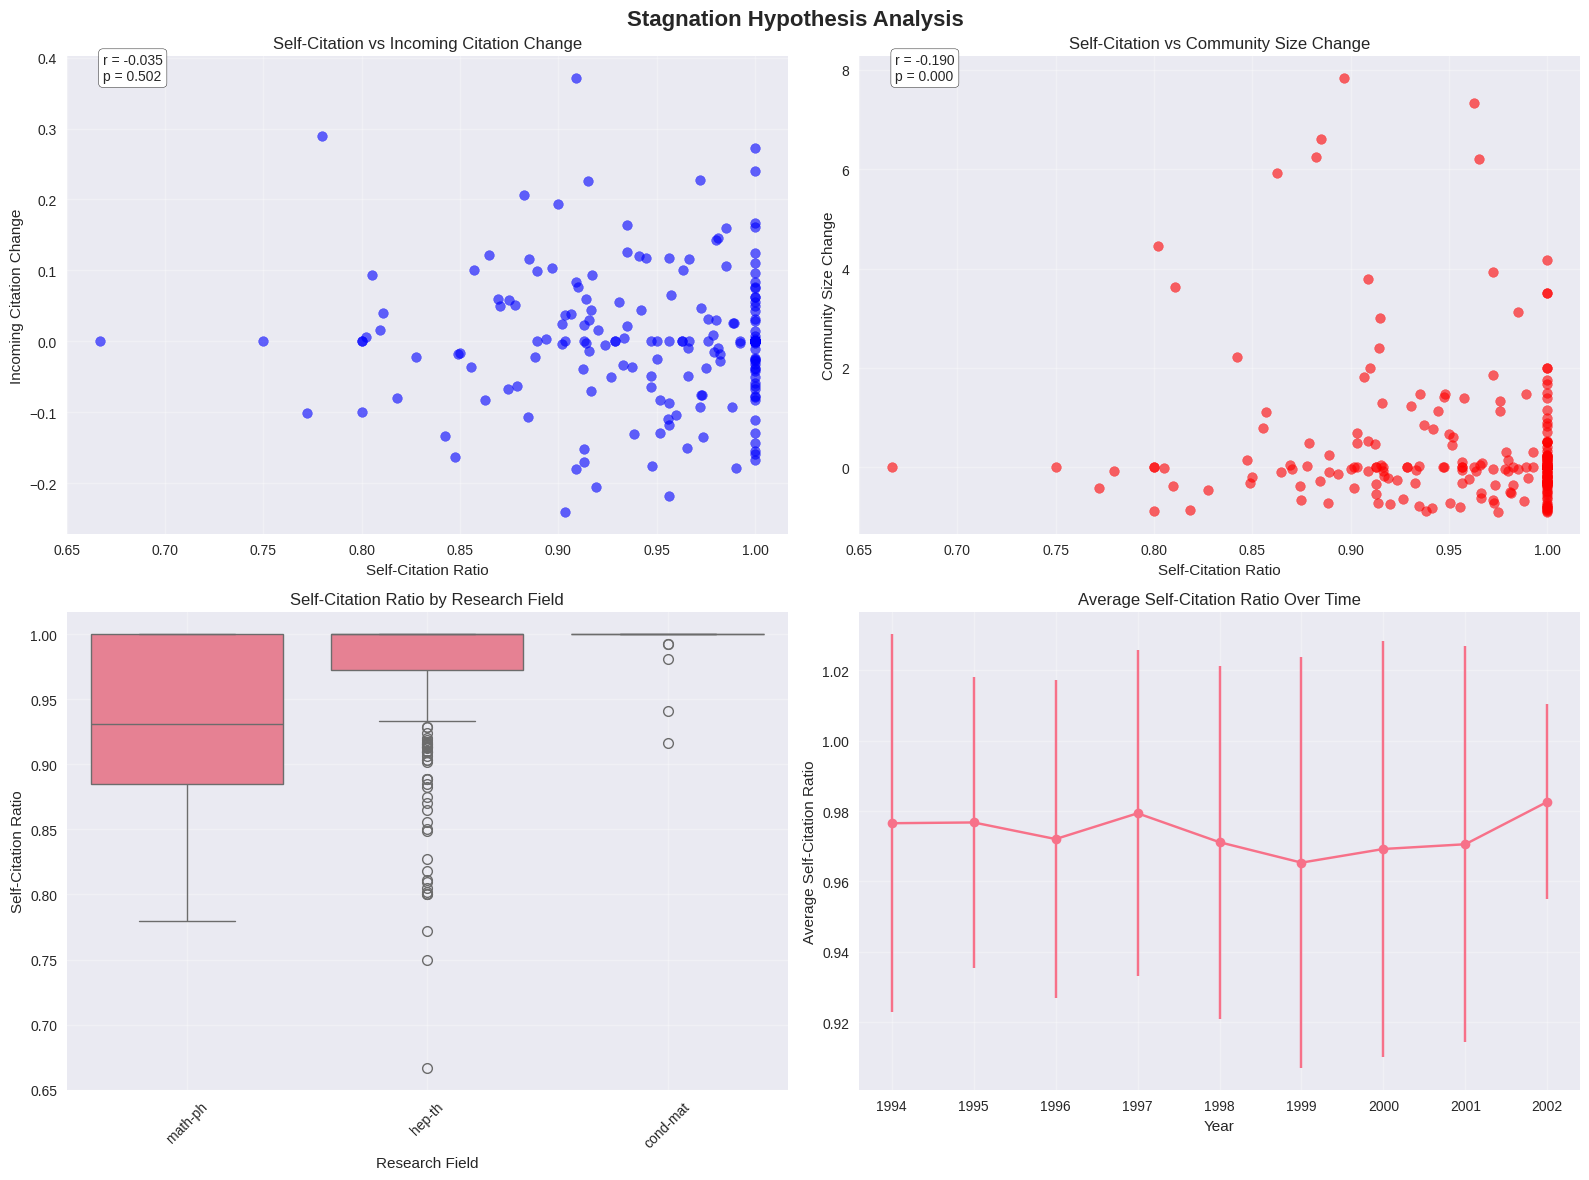

Exporting community-field mapping tables...
Community-field mapping saved to 'community_field_mapping.csv'

Community-Field Mapping Summary:
Total communities analyzed: 555
Years covered: 1993 - 2002
Fields identified: ['math-ph' 'hep-th' 'cond-mat']
Average field purity: 0.928

Enhanced Analysis Summary:
- Analyzed 11 time periods
- Total communities with field mapping: 555
- Research fields identified: 3
- Stagnation hypothesis support: Weak/No


In [8]:
# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
from scipy.stats import skew, pearsonr


def load_and_preprocess_data_with_fields():
    """Load and preprocess citation network data with field information"""
    print("Loading citation network data with field mapping...")

    # Load citation edges
    edges_df = pd.read_csv("Cit-HepTh.txt", comment='#', sep='\t', names=['source', 'target'])

    # Load metadata with year and field information
    merged_df = pd.read_csv("/content/metadata_with_dates.csv")

    # Check if field/category information exists in metadata
    field_columns = [col for col in merged_df.columns if 'field' in col.lower() or 'category' in col.lower() or 'subject' in col.lower()]
    if field_columns:
        print(f"Found field columns: {field_columns}")
        field_col = field_columns[0]  # Use the first field column
    else:
        # If no explicit field column, try to extract from paper_id (ArXiv format)
        print("No explicit field column found. Attempting to extract from paper_id...")
        merged_df['field'] = merged_df['paper_id'].astype(str).str.extract(r'([a-z-]+)/', expand=False)
        field_col = 'field'

    # Merge year and field information
    edges_df = pd.merge(edges_df, merged_df[['paper_id', 'year', field_col]],
                       left_on='source', right_on='paper_id', how='left')
    edges_df = edges_df.drop(columns=['paper_id'])
    edges_df = edges_df.rename(columns={field_col: 'source_field'})

    # Also get target field information
    edges_df = pd.merge(edges_df, merged_df[['paper_id', field_col]],
                       left_on='target', right_on='paper_id', how='left')
    edges_df = edges_df.drop(columns=['paper_id'])
    edges_df = edges_df.rename(columns={field_col: 'target_field'})

    # Filter by year range
    edges_df = edges_df[(edges_df['year'] >= 1992) & (edges_df['year'] <= 2003)]

    print(f"Loaded {len(edges_df)} citation edges from {edges_df['year'].min()} to {edges_df['year'].max()}")

    # Print field distribution
    if 'source_field' in edges_df.columns:
        print(f"Fields found: {sorted(edges_df['source_field'].dropna().unique())}")

    return edges_df, merged_df

def map_communities_to_fields(partition, field_mapping):
    """Map communities to their dominant research fields"""
    community_fields = defaultdict(lambda: defaultdict(int))

    # Count field occurrences in each community
    for node, community in partition.items():
        if node in field_mapping and field_mapping[node] is not None:
            field = field_mapping[node]
            community_fields[community][field] += 1

    # Determine dominant field for each community
    community_dominant_fields = {}
    for community, field_counts in community_fields.items():
        if field_counts:
            dominant_field = max(field_counts.items(), key=lambda x: x[1])[0]
            total_nodes = sum(field_counts.values())
            dominant_ratio = field_counts[dominant_field] / total_nodes
            community_dominant_fields[community] = {
                'field': dominant_field,
                'ratio': dominant_ratio,
                'field_distribution': dict(field_counts)
            }

    return community_dominant_fields

# Community Analysis with Field Information
def compute_enhanced_metrics(G, partition, field_mapping):
    """Compute enhanced structural metrics including field diversity"""
    comm_metrics = defaultdict(dict)

    if len(partition) == 0:
        return comm_metrics

    # Map communities to fields
    community_fields = map_communities_to_fields(partition, field_mapping)

    for comm_id in set(partition.values()):
        nodes = [n for n in partition if partition[n] == comm_id]
        subgraph = G.subgraph(nodes)

        comm_metrics[comm_id]['size'] = len(nodes)
        comm_metrics[comm_id]['modularity'] = compute_modularity(G.to_undirected(), partition)

        # Field information
        if comm_id in community_fields:
            comm_metrics[comm_id]['dominant_field'] = community_fields[comm_id]['field']
            comm_metrics[comm_id]['field_purity'] = community_fields[comm_id]['ratio']
            comm_metrics[comm_id]['field_distribution'] = community_fields[comm_id]['field_distribution']
        else:
            comm_metrics[comm_id]['dominant_field'] = 'Unknown'
            comm_metrics[comm_id]['field_purity'] = 0
            comm_metrics[comm_id]['field_distribution'] = {}

        # Centrality metrics
        if len(nodes) > 1:
            try:
                betweenness = nx.betweenness_centrality(subgraph)
                comm_metrics[comm_id]['avg_betweenness'] = sum(betweenness.values()) / len(nodes)
                centrality = nx.degree_centrality(subgraph)
                comm_metrics[comm_id]['avg_centrality'] = sum(centrality.values()) / len(nodes)
            except:
                comm_metrics[comm_id]['avg_betweenness'] = 0
                comm_metrics[comm_id]['avg_centrality'] = 0
        else:
            comm_metrics[comm_id]['avg_betweenness'] = 0
            comm_metrics[comm_id]['avg_centrality'] = 0

    return comm_metrics

# Stagnation Hypothesis Analysis
def compute_stagnation_metrics(yearly_graphs, yearly_partitions, yearly_metrics):
    """Compute metrics to test the stagnation hypothesis"""
    print("Computing stagnation metrics...")

    stagnation_data = []
    years = sorted(yearly_graphs.keys())

    for i, year in enumerate(years):
        G = yearly_graphs[year]
        partition = yearly_partitions[year]

        if not partition:
            continue

        # Compute self-citation ratios
        self_citation_ratios = compute_self_citation_ratio(G, partition)

        # Compute incoming citation changes (if we have previous year)
        incoming_citation_changes = {}
        community_size_changes = {}

        if i > 0:
            prev_year = years[i-1]
            prev_G = yearly_graphs[prev_year]
            prev_partition = yearly_partitions[prev_year]

            if prev_partition:
                # Match communities between years
                matches = match_communities(prev_partition, partition)

                for curr_comm, prev_comm in matches.items():
                    if prev_comm is not None:
                        # Calculate incoming citation change
                        curr_nodes = [n for n in partition if partition[n] == curr_comm]
                        prev_nodes = [n for n in prev_partition if prev_partition[n] == prev_comm]

                        # Count incoming edges (from outside the community)
                        curr_incoming = sum(1 for u, v in G.edges()
                                          if v in curr_nodes and partition.get(u) != curr_comm)
                        prev_incoming = sum(1 for u, v in prev_G.edges()
                                          if v in prev_nodes and prev_partition.get(u) != prev_comm)

                        # Calculate change (normalized by community size)
                        curr_size = len(curr_nodes)
                        prev_size = len(prev_nodes)

                        if prev_size > 0 and curr_size > 0:
                            curr_incoming_norm = curr_incoming / curr_size
                            prev_incoming_norm = prev_incoming / prev_size
                            incoming_citation_changes[curr_comm] = curr_incoming_norm - prev_incoming_norm
                            community_size_changes[curr_comm] = (curr_size - prev_size) / prev_size

        # Store data for each community
        for comm_id in set(partition.values()):
            if comm_id in self_citation_ratios:
                row = {
                    'year': year,
                    'community': comm_id,
                    'self_citation_ratio': self_citation_ratios[comm_id],
                    'incoming_citation_change': incoming_citation_changes.get(comm_id, np.nan),
                    'size_change': community_size_changes.get(comm_id, np.nan),
                    'size': yearly_metrics[year][comm_id]['size'],
                    'field': yearly_metrics[year][comm_id].get('dominant_field', 'Unknown')
                }
                stagnation_data.append(row)

    return pd.DataFrame(stagnation_data)

def analyze_stagnation_correlations(stagnation_df):
    """Analyze correlations to test stagnation hypothesis"""
    print("Analyzing stagnation correlations...")

    # Remove rows with NaN values for correlation analysis
    correlation_df = stagnation_df.dropna(subset=['self_citation_ratio', 'incoming_citation_change', 'size_change'])

    if len(correlation_df) < 10:
        print("Insufficient data for correlation analysis")
        return None, None

    # Calculate correlations
    correlations = {}

    # Self-citation ratio vs incoming citation change
    corr_incoming, p_incoming = pearsonr(correlation_df['self_citation_ratio'],
                                        correlation_df['incoming_citation_change'])
    correlations['self_citation_vs_incoming'] = {'correlation': corr_incoming, 'p_value': p_incoming}

    # Self-citation ratio vs community size change
    corr_size, p_size = pearsonr(correlation_df['self_citation_ratio'],
                                correlation_df['size_change'])
    correlations['self_citation_vs_size_change'] = {'correlation': corr_size, 'p_value': p_size}

    # Incoming citations vs size change
    corr_incoming_size, p_incoming_size = pearsonr(correlation_df['incoming_citation_change'],
                                                  correlation_df['size_change'])
    correlations['incoming_vs_size_change'] = {'correlation': corr_incoming_size, 'p_value': p_incoming_size}

    return correlations, correlation_df

# Visualization Functions
def plot_field_distribution_over_time(yearly_metrics):
    """Plot field distribution in communities over time"""
    field_data = []

    for year, metrics in yearly_metrics.items():
        field_counts = defaultdict(int)
        total_communities = len(metrics)

        for comm_id, comm_data in metrics.items():
            field = comm_data.get('dominant_field', 'Unknown')
            field_counts[field] += 1

        for field, count in field_counts.items():
            field_data.append({
                'year': year,
                'field': field,
                'count': count,
                'proportion': count / total_communities if total_communities > 0 else 0
            })

    df = pd.DataFrame(field_data)

    if len(df) == 0:
        print("No field data available for visualization")
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Research Field Distribution in Communities Over Time', fontsize=16, fontweight='bold')

    # Stacked area plot for proportions
    pivot_prop = df.pivot(index='year', columns='field', values='proportion').fillna(0)
    pivot_prop.plot(kind='area', stacked=True, ax=ax1, alpha=0.7)
    ax1.set_title('Field Proportions Over Time')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Proportion of Communities')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Line plot for absolute counts
    for field in pivot_prop.columns:
        if field != 'Unknown':  # Exclude unknown field for clarity
            field_years = df[df['field'] == field]
            ax2.plot(field_years['year'], field_years['count'], marker='o', label=field)

    ax2.set_title('Community Count by Field Over Time')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Communities')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_stagnation_analysis(stagnation_df, correlations):
    """Plot stagnation hypothesis analysis results"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Stagnation Hypothesis Analysis', fontsize=16, fontweight='bold')

    # Filter out NaN values for plotting
    plot_df = stagnation_df.dropna(subset=['self_citation_ratio', 'incoming_citation_change', 'size_change'])

    if len(plot_df) == 0:
        print("No valid data for stagnation analysis plots")
        return

    # Self-citation ratio vs incoming citation change
    axes[0, 0].scatter(plot_df['self_citation_ratio'], plot_df['incoming_citation_change'],
                      alpha=0.6, color='blue')
    axes[0, 0].set_xlabel('Self-Citation Ratio')
    axes[0, 0].set_ylabel('Incoming Citation Change')
    axes[0, 0].set_title('Self-Citation vs Incoming Citation Change')

    if correlations and 'self_citation_vs_incoming' in correlations:
        corr = correlations['self_citation_vs_incoming']
        axes[0, 0].text(0.05, 0.95, f"r = {corr['correlation']:.3f}\np = {corr['p_value']:.3f}",
                       transform=axes[0, 0].transAxes, bbox=dict(boxstyle="round", facecolor='white'))

    # Self-citation ratio vs community size change
    axes[0, 1].scatter(plot_df['self_citation_ratio'], plot_df['size_change'],
                      alpha=0.6, color='red')
    axes[0, 1].set_xlabel('Self-Citation Ratio')
    axes[0, 1].set_ylabel('Community Size Change')
    axes[0, 1].set_title('Self-Citation vs Community Size Change')

    if correlations and 'self_citation_vs_size_change' in correlations:
        corr = correlations['self_citation_vs_size_change']
        axes[0, 1].text(0.05, 0.95, f"r = {corr['correlation']:.3f}\np = {corr['p_value']:.3f}",
                       transform=axes[0, 1].transAxes, bbox=dict(boxstyle="round", facecolor='white'))

    # Self-citation ratio by field
    if 'field' in plot_df.columns:
        field_counts = plot_df['field'].value_counts()
        top_fields = field_counts.head(5).index  # Show top 5 fields
        field_plot_df = plot_df[plot_df['field'].isin(top_fields)]

        sns.boxplot(data=field_plot_df, x='field', y='self_citation_ratio', ax=axes[1, 0])
        axes[1, 0].set_title('Self-Citation Ratio by Research Field')
        axes[1, 0].set_xlabel('Research Field')
        axes[1, 0].set_ylabel('Self-Citation Ratio')
        axes[1, 0].tick_params(axis='x', rotation=45)

    # Temporal trend of self-citation ratio
    temporal_stats = plot_df.groupby('year')['self_citation_ratio'].agg(['mean', 'std']).reset_index()
    axes[1, 1].errorbar(temporal_stats['year'], temporal_stats['mean'],
                       yerr=temporal_stats['std'], marker='o', capsize=5)
    axes[1, 1].set_title('Average Self-Citation Ratio Over Time')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Average Self-Citation Ratio')
    axes[1, 1].grid(True, alpha=0.3)

    for ax in axes.flat:
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def export_community_field_tables(yearly_metrics, yearly_partitions):
    """Export detailed tables of communities and their field mappings"""
    print("Exporting community-field mapping tables...")

    all_data = []

    for year, metrics in yearly_metrics.items():
        for comm_id, comm_data in metrics.items():
            row = {
                'year': year,
                'community_id': comm_id,
                'size': comm_data['size'],
                'dominant_field': comm_data.get('dominant_field', 'Unknown'),
                'field_purity': comm_data.get('field_purity', 0),
                'modularity': comm_data['modularity'],
                'avg_betweenness': comm_data['avg_betweenness'],
                'avg_centrality': comm_data['avg_centrality']
            }

            # Add field distribution details
            field_dist = comm_data.get('field_distribution', {})
            for field, count in field_dist.items():
                row[f'field_{field}_count'] = count

            all_data.append(row)

    df = pd.DataFrame(all_data)

    # Save to CSV
    df.to_csv('community_field_mapping.csv', index=False)
    print("Community-field mapping saved to 'community_field_mapping.csv'")

    # Display summary statistics
    print("\nCommunity-Field Mapping Summary:")
    print(f"Total communities analyzed: {len(df)}")
    print(f"Years covered: {df['year'].min()} - {df['year'].max()}")
    print(f"Fields identified: {df['dominant_field'].unique()}")
    print(f"Average field purity: {df['field_purity'].mean():.3f}")

    return df

# Main Analysis Pipeline
def run_enhanced_citation_analysis():
    """Main function to run the enhanced citation network analysis"""
    print("Starting Enhanced Citation Network Analysis...")


    # Load data with field information
    edges_df, metadata_df = load_and_preprocess_data_with_fields()

    # Create field mapping dictionary
    field_mapping = dict(zip(metadata_df['paper_id'],
                           metadata_df.get('field', metadata_df.get('source_field', None))))

    # Build yearly graphs
    yearly_graphs = build_yearly_graphs(edges_df, window=3)

    # community detection and metrics
    print("\nDetecting communities and computing enhanced metrics...")
    yearly_partitions = {}
    yearly_metrics = {}
    community_matches = {}

    for year in sorted(yearly_graphs.keys()):
        print(f"Processing year {year}...")
        G = yearly_graphs[year]

        # Detect communities
        partition = detect_communities(G)
        yearly_partitions[year] = partition

        # Compute enhanced metrics with field information
        metrics = compute_enhanced_metrics(G, partition, field_mapping)
        yearly_metrics[year] = metrics

        # Match communities with previous year
        prev_year = year - 1
        if prev_year in yearly_partitions and yearly_partitions[prev_year]:
            matches = match_communities(yearly_partitions[prev_year], partition)
            community_matches[year] = matches

        print(f"  Found {len(set(partition.values())) if partition else 0} communities")

    # Stagnation hypothesis analysis
    print("\nAnalyzing stagnation hypothesis...")
    stagnation_df = compute_stagnation_metrics(yearly_graphs, yearly_partitions, yearly_metrics)
    correlations, correlation_df = analyze_stagnation_correlations(stagnation_df)

    if correlations:
        print("\nStagnation Hypothesis Results:")
        print(f"Self-citation vs Incoming citation change: r = {correlations['self_citation_vs_incoming']['correlation']:.3f}, p = {correlations['self_citation_vs_incoming']['p_value']:.3f}")
        print(f"Self-citation vs Community size change: r = {correlations['self_citation_vs_size_change']['correlation']:.3f}, p = {correlations['self_citation_vs_size_change']['p_value']:.3f}")

    # visualizations
    print("\nGenerating enhanced visualizations...")

    # Field distribution analysis
    plot_field_distribution_over_time(yearly_metrics)

    # Stagnation analysis plots
    plot_stagnation_analysis(stagnation_df, correlations)

    # Export community-field mapping tables
    community_df = export_community_field_tables(yearly_metrics, yearly_partitions)

    # ummary statistics
    print("\nEnhanced Analysis Summary:")
    print(f"- Analyzed {len(yearly_graphs)} time periods")
    print(f"- Total communities with field mapping: {len(community_df)}")
    print(f"- Research fields identified: {len(community_df['dominant_field'].unique())}")
    if correlations:
        print(f"- Stagnation hypothesis support: {'Yes' if correlations['self_citation_vs_incoming']['correlation'] < -0.1 else 'Weak/No'}")

    return {
        'yearly_graphs': yearly_graphs,
        'yearly_partitions': yearly_partitions,
        'yearly_metrics': yearly_metrics,
        'community_matches': community_matches,
        'stagnation_df': stagnation_df,
        'correlations': correlations,
        'community_df': community_df
    }


if __name__ == "__main__":
    results = run_enhanced_citation_analysis()